<h1 align='center'>Heart Attack Analysis and Prediction</h1>

### Project Content
1. [Introduction](#1)
    * 1.1 [Examining the Project Topic](#2)
    * 1.2 [Recognizing the variable](#3)
2. [First Organization](#4)
    * 2.1 [Required Libraries](#5)
        * 2.1.1 [Basic Libraries](#6)

### 1. Introduction <a id = 1/></a>

#### 1.1 Examining the Project Topic <a id = 2></a>

- The medical name of a heart attack is “Myocardial infarction”.
- Heart attack in short; It is the occlusion of the vessel by plaque-like lesions filled with cholesterol and fat.
- The lesion is an abnormal conditions that occur in the organs where the disease is located.
- As a result of the blockage, the blood flow is completely cut off, and a heart attack that can lead to death occurs.

#### 1.2 Recognizing the variable<a id = 3></a>

**Variable defintions in the Dataset**
- age - age in years
- sex 
    - Value 1 = male; 
    - Value 0 = female
- cp - chest pain type 
    - Value 1 = typical angina; 
    - Value 2 = atypical angina; 
    - Value 3 = non-anginal pain; 
    - Value 0 = asymptomatic
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - fasting blood sugar > 120 mg/dl 
    - Value 1 = true
    - Value 0 = false
- restecg - resting electrocardiographic results 
    - Value 1 = normal; 
    - Value 2 = having ST-T wave abnormality; 
    - Value 0 = hypertrophy
- thalach - maximum heart rate achieved
- exang - exercise induced angina 
    - Value 1 = yes 
    - Value 0 = no
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment 
    - Value 2 = upsloping; 
    - Value 1 = flat; 
    - Value 0 = downsloping)
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 
    - Value 2 = normal; 
    - Value 1 = fixed defect; 
    - Value 3 = reversable defect
- num - the predicted attribute - diagnosis of heart disease (angiographic disease status) 
    - Value 0 = < diameter narrowing 
    - Value 1 = > 50% diameter narrowing

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
dataset = pd.read_csv('heart.csv')
dataset

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

### Initial analysis

In [3]:
dataset.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [4]:
dataset.rename(columns={'thalachh':'thalach', 'exng':'exang', 'output':'target', 'restecg':'rest_ecg', 
                       'caa':'ca'}, inplace=True)
dataset.head(3)

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  slp  \
0   63    1   3     145   233    1         0      150      0      2.3    0   
1   37    1   2     130   250    0         1      187      0      3.5    0   
2   41    0   1     130   204    0         0      172      0      1.4    2   

   ca  thall  target  
0   0      1       1  
1   0      2       1  
2   0      2       1

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thall     303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
dataset.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

         rest_ecg     thalach       exang     oldpeak         slp          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [7]:
dataset.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slp         0
ca          0
thall       0
target      0
dtype: int64

## Preparation for exploratory data analysis (EDA)

### Examining missing values

In [8]:
dataset.isna().sum().to_frame(name='MissingValues')

MissingValues
age                   0
sex                   0
cp                    0
trtbps                0
chol                  0
fbs                   0
rest_ecg              0
thalach               0
exang                 0
oldpeak               0
slp                   0
ca                    0
thall                 0
target                0

<Axes: >

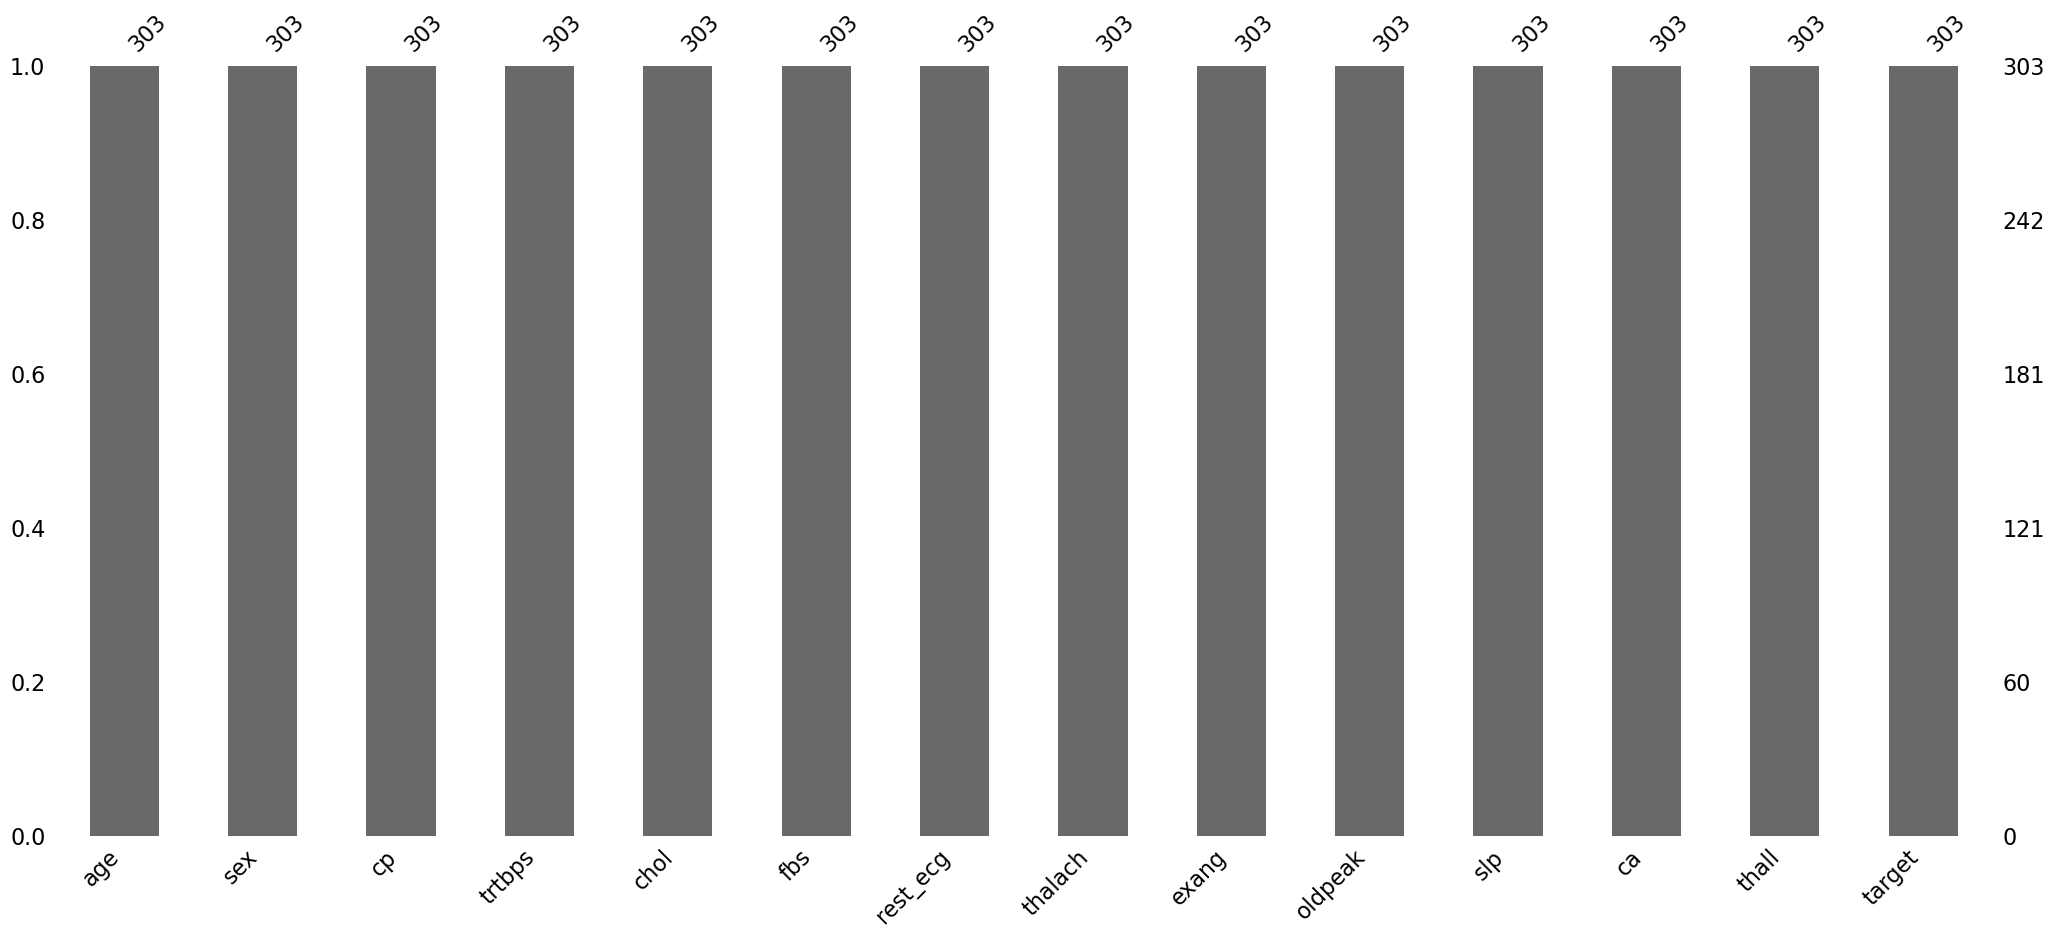

In [9]:
import missingno
missingno.bar(dataset)

### Examining unique values

In [10]:
dataset['age'].value_counts()

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64

In [11]:
dataset.value_counts().to_frame('Total Unique Values').sort_values(by='Total Unique Values', ascending=False)

Total Unique Values
age sex cp trtbps chol fbs rest_ecg thalach exang oldpeak slp ca thall target                     
38  1   2  138    175  0   1        173     0     0.0     2   4  2     1                         2
41  0   1  105    198  0   1        168     0     0.0     2   1  2     1                         1
35  0   0  138    183  0   1        182     0     1.4     2   0  2     1                         1
    1   0  120    198  0   1        130     1     1.6     1   0  3     0                         1
           126    282  0   0        156     1     0.0     2   0  3     0                         1
...                                                                                            ...
71  0   2  110    265  1   0        130     0     0.0     2   1  2     1                         1
74  0   1  120    269  0   0        121     1     0.2     2   1  2     1                         1
76  0   2  140    197  0   2        116     0     1.1     1   0  2     1                         1
68  0   2  120    211  0   0        115     0     1.5     1   0  2     1                         1
77  1   0  125    304  0   0        162     1     0.0     2   3  2     0                         1

[302 rows x 1 columns]

In [12]:
unique_number = []
for i in dataset.columns:
    x = dataset[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index=dataset.columns, columns=['Total Unique Values'])

Total Unique Values
age                        41
sex                         2
cp                          4
trtbps                     49
chol                      152
fbs                         2
rest_ecg                    3
thalach                    91
exang                       2
oldpeak                    40
slp                         3
ca                          5
thall                       4
target                      2

In [13]:
print(unique_number)

[np.int64(41), np.int64(2), np.int64(4), np.int64(49), np.int64(152), np.int64(2), np.int64(3), np.int64(91), np.int64(2), np.int64(40), np.int64(3), np.int64(5), np.int64(4), np.int64(2)]


### Separating Variables (Numeric/Categorical)

In [14]:
numeric_var = ['age', 'trtbps', 'chol', 'thalach', 'oldpeak']
categorical_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slp", "ca", "thall", "target"]

### Statistical Analysis on dataset (only numeric)

In [15]:
dataset[['age', 'trtbps', 'chol', 'thalach', 'oldpeak']].describe()

age      trtbps        chol     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000

### Statistical Analysis (Age)

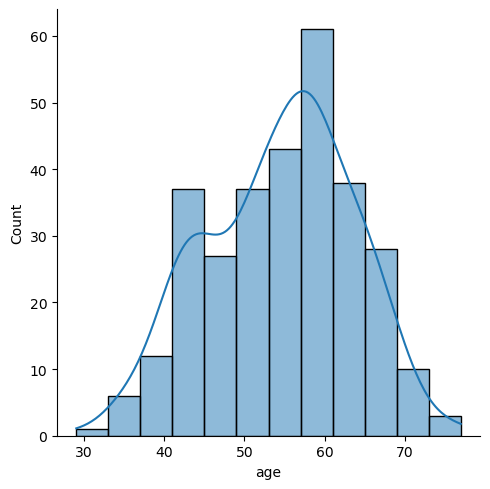

In [16]:
sns.displot(dataset['age'], kind='hist', kde=True, linewidth=1, edgecolor='k')

<Axes: ylabel='age'>

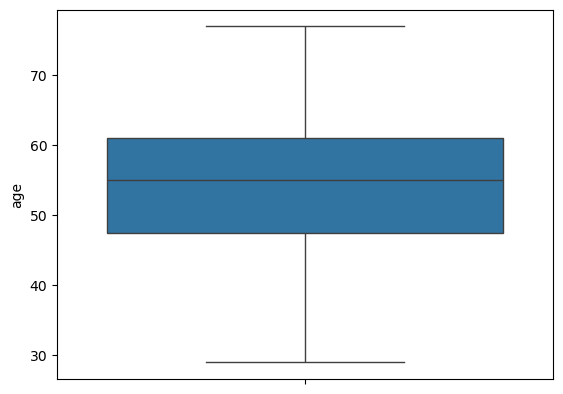

In [17]:
sns.boxplot(dataset['age'])

### Statistical analysis (trtbps)

In [18]:
dataset['trtbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trtbps, dtype: float64

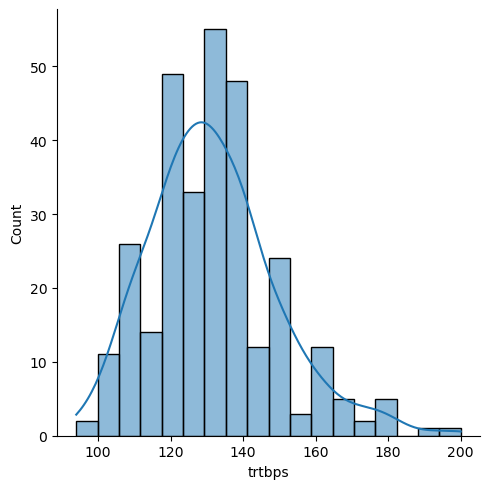

In [19]:
sns.displot(dataset['trtbps'], kind='hist', kde=True, linewidth=1, edgecolor='k')

<Axes: ylabel='trtbps'>

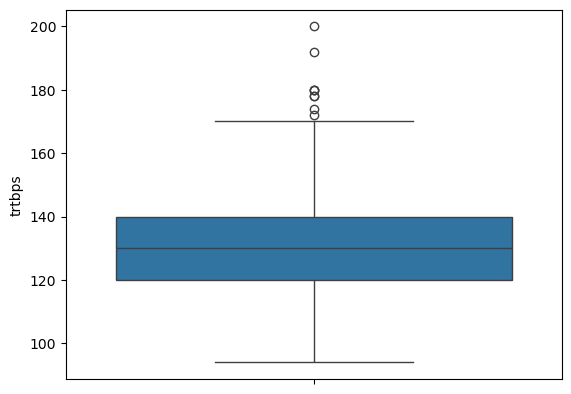

In [20]:
sns.boxplot(dataset['trtbps'])

### Statistical Analysis (chol)

In [21]:
dataset['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

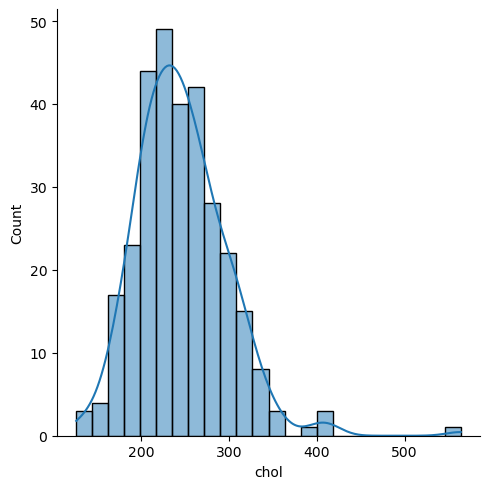

In [22]:
sns.displot(dataset['chol'], kind='hist', kde=True, linewidth=1, edgecolor='k')

<Axes: ylabel='chol'>

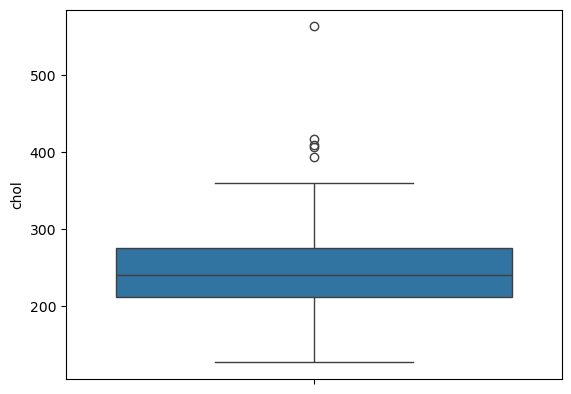

In [23]:
sns.boxplot(dataset['chol'])

### Statistical analysis (thalach)

In [24]:
dataset['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

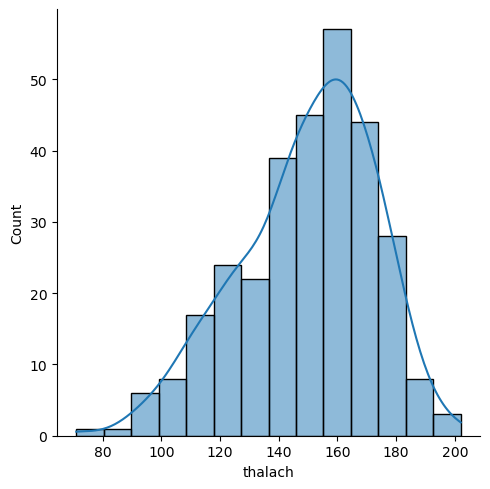

In [25]:
sns.displot(dataset['thalach'], kind='hist', kde='true')

<Axes: ylabel='thalach'>

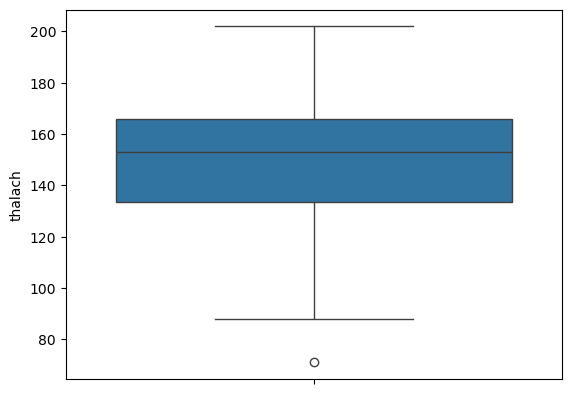

In [26]:
sns.boxplot(dataset['thalach'])

### Statistical analysis (oldpeak)

In [27]:
dataset['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

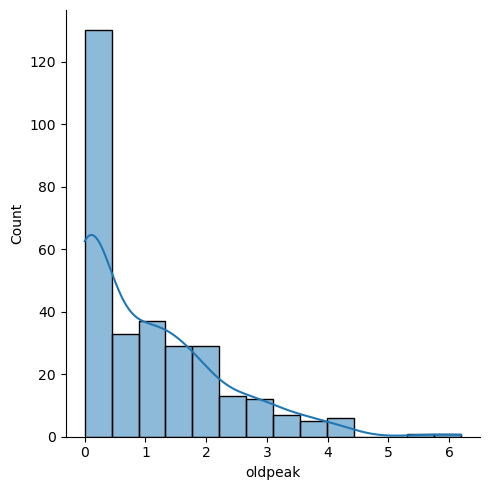

In [28]:
sns.displot(dataset['oldpeak'], kind='hist', kde=True)

<Axes: ylabel='oldpeak'>

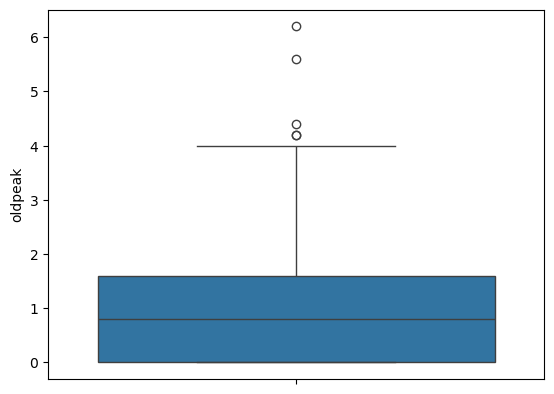

In [29]:
sns.boxplot(dataset['oldpeak'])

## Univariate Analysis

### Numerical features using loop

In [30]:
numeric_axis_map = {'age':'Age of the Patient', 'trtbps':'Resting Blood Pressure', 'chol':'Cholesterol', 
                   'thalach':'Maximum Heart Rate Achieved', 'oldpeak':'ST Depression'}

<Figure size 2000x1000 with 0 Axes>

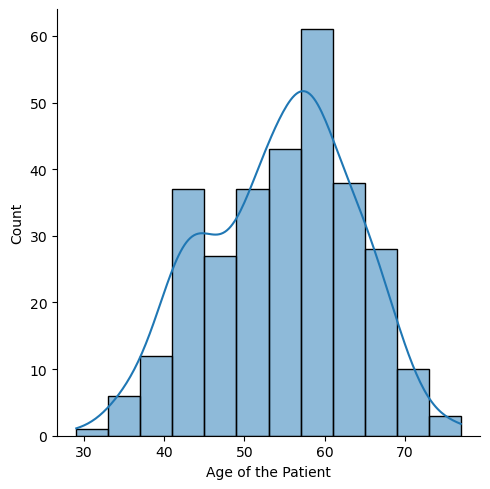

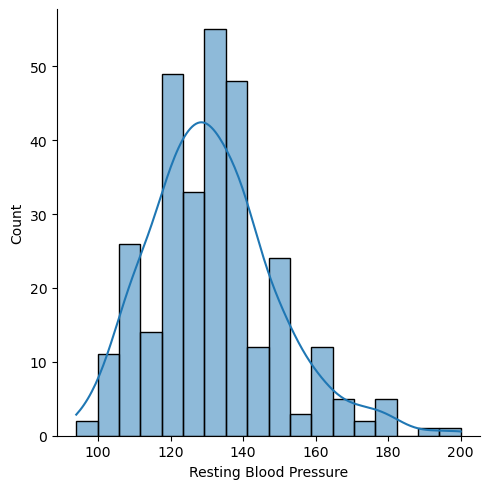

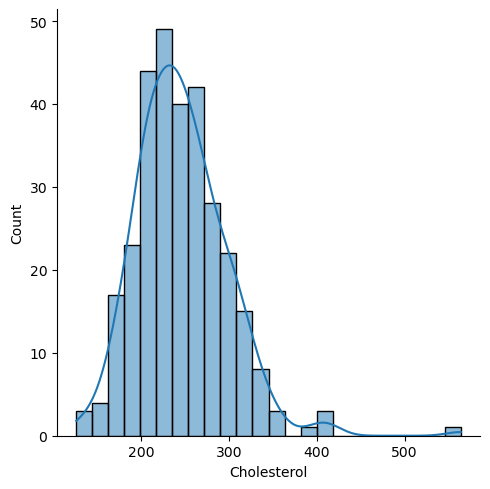

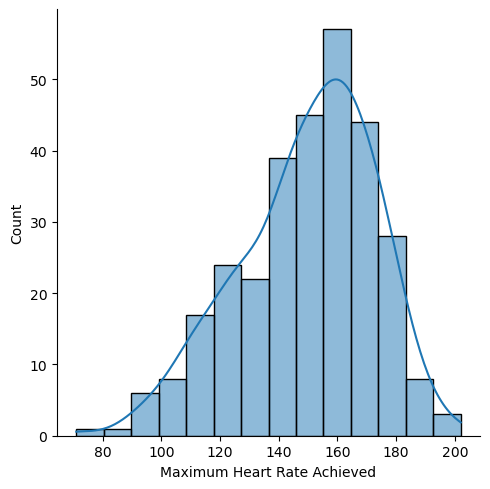

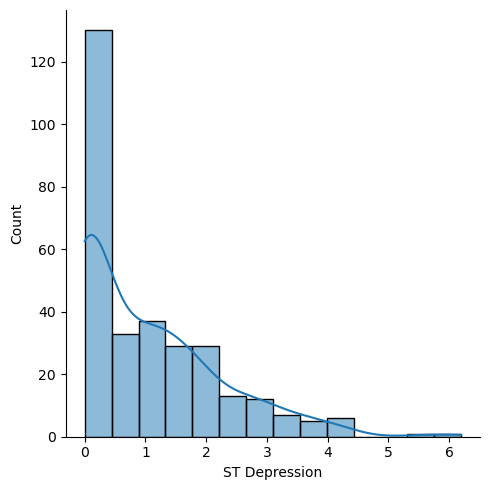

In [31]:
plt.figure(figsize=(20,10))
for numerical_feature in numeric_var:
    sns.displot(dataset[numerical_feature], kind='hist', kde=True, linewidth=1, edgecolor='k')
    plt.xlabel(numeric_axis_map[numerical_feature])
    plt.show()

### Categorical Features (Bi-Variate Analysis)

<Axes: xlabel='sex', ylabel='count'>

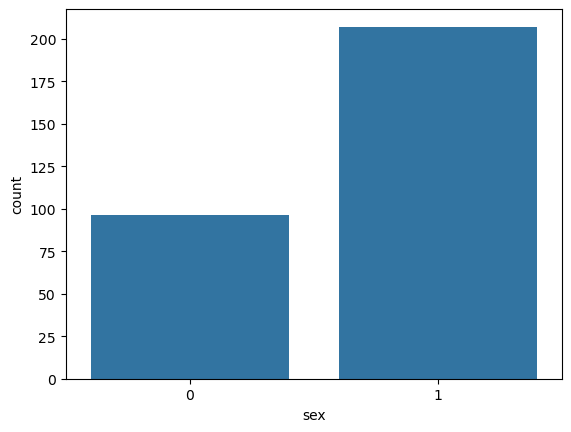

In [32]:
sns.countplot(dataset, x='sex')

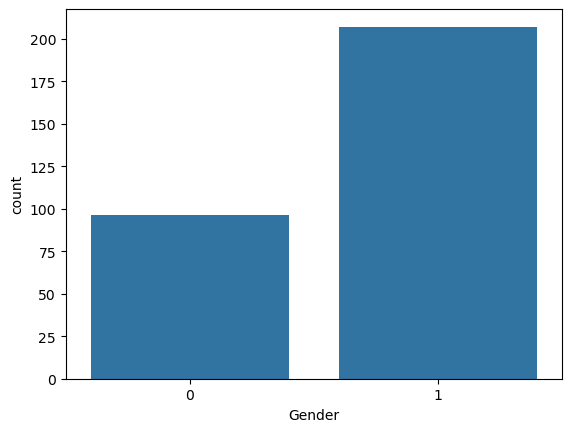

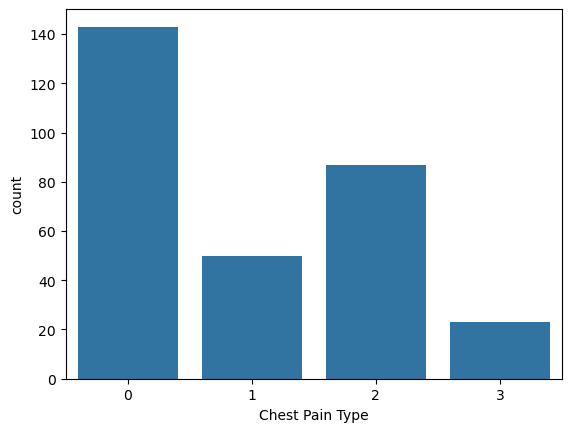

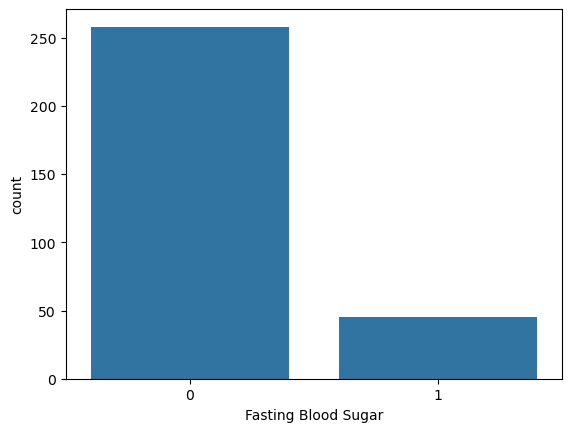

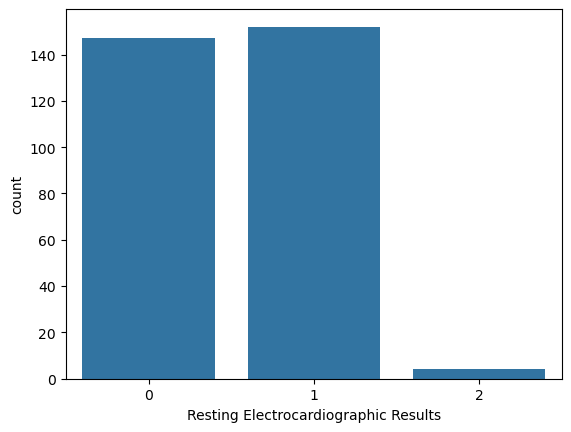

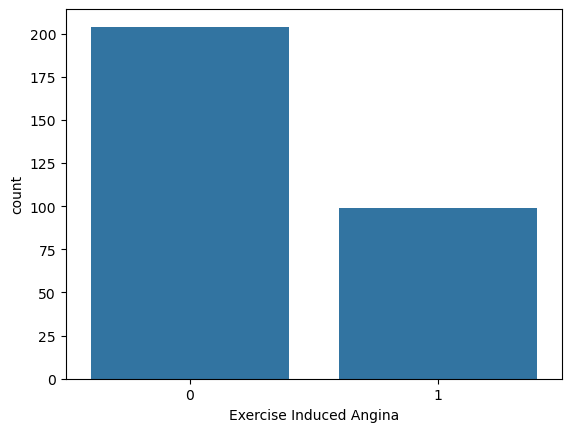

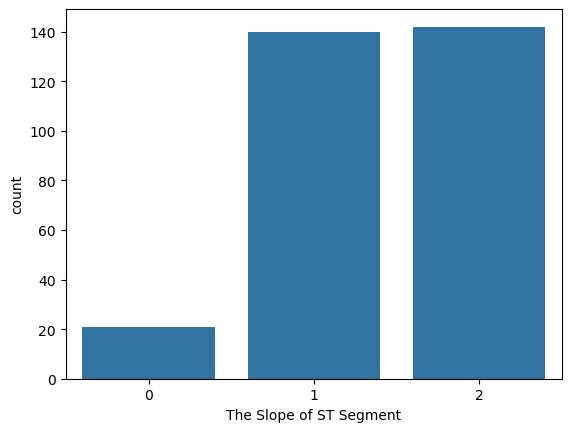

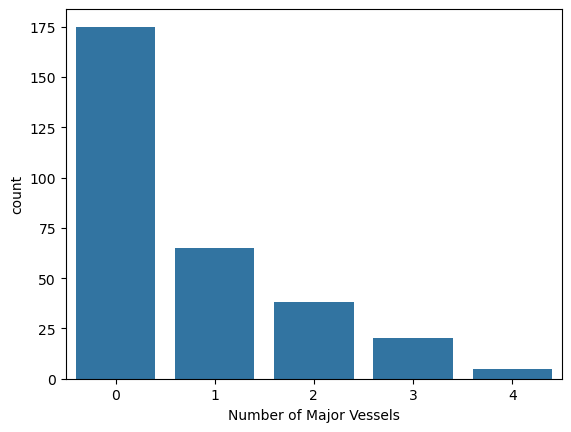

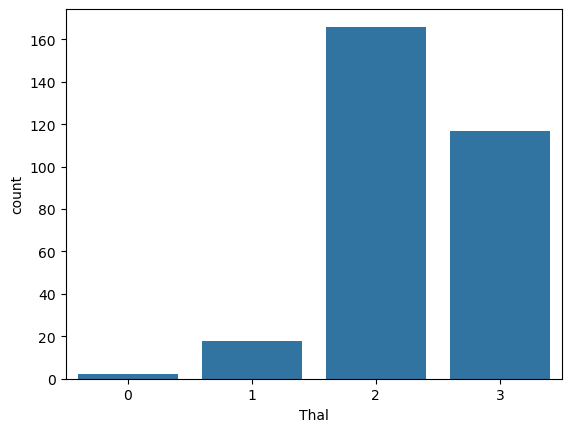

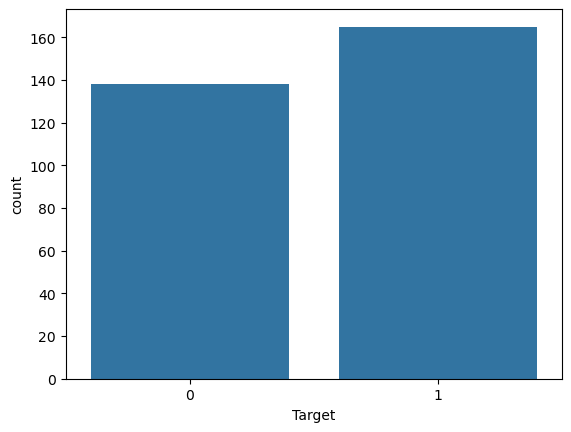

In [33]:
categorical_axis_map = {"sex":'Gender', "cp":'Chest Pain Type', "fbs":'Fasting Blood Sugar', 
                        "rest_ecg":'Resting Electrocardiographic Results', "exang":'Exercise Induced Angina', 
                        "slp":'The Slope of ST Segment', "ca":'Number of Major Vessels', "thall":'Thal', 
                        "target":'Target'}
for categorical_features in categorical_var:
    sns.countplot(dataset, x=categorical_features)
    plt.xlabel(categorical_axis_map[categorical_features])
    plt.show()


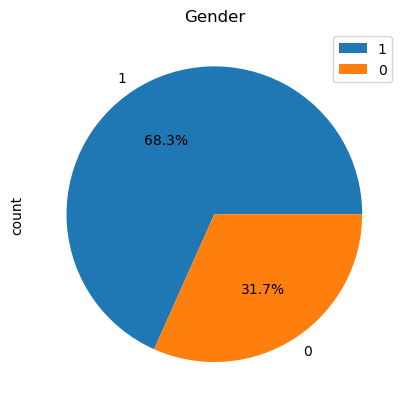

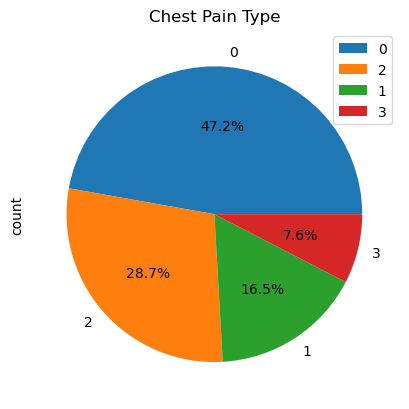

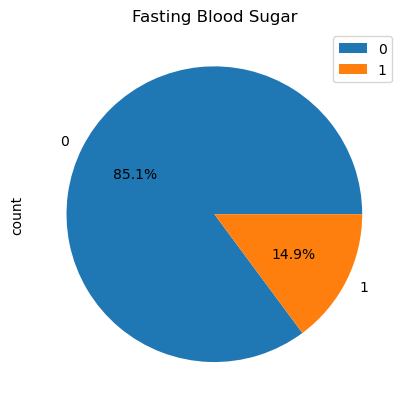

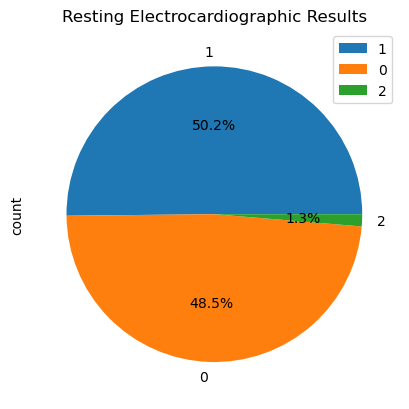

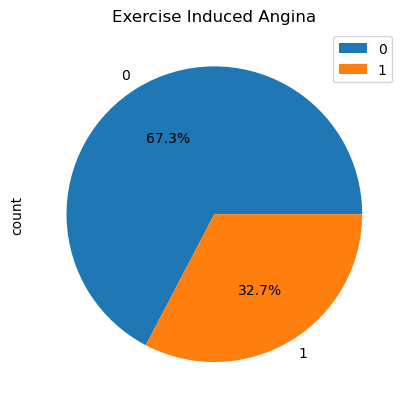

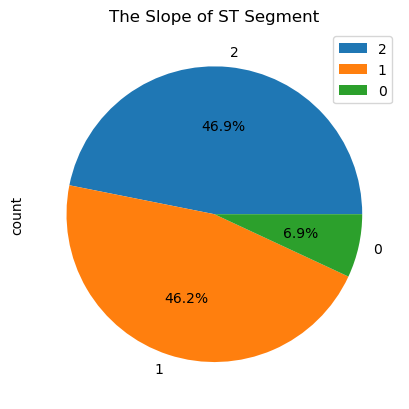

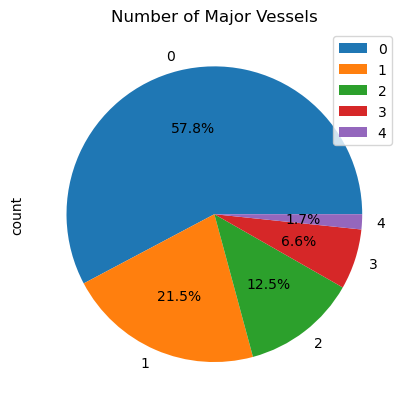

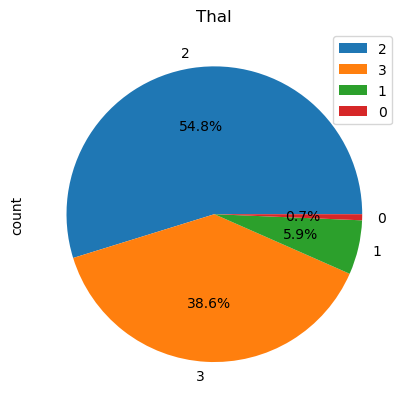

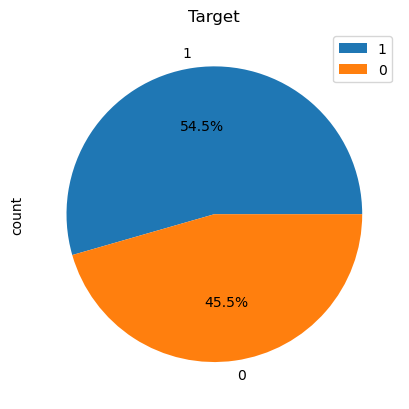

In [34]:
for categorical_features in categorical_var:
    dataset[categorical_features].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(categorical_axis_map[categorical_features])
    plt.legend()
    plt.show()

### Handling missing values

In [35]:
dataset[dataset['thall'] == 0]

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  slp  \
48    53    0   2     128   216    0         0      115      0      0.0    2   
281   52    1   0     128   204    1         1      156      1      1.0    1   

     ca  thall  target  
48    0      0       1  
281   0      0       0

In [36]:
# dataset['thall'].replace({0: np.nan}, inplace=True) commenting due to warning
dataset.replace({'thall':{0:np.nan}}, inplace=True)

In [37]:
dataset['thall'].value_counts()

thall
2.0    166
3.0    117
1.0     18
Name: count, dtype: int64

In [38]:
dataset.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slp         0
ca          0
thall       2
target      0
dtype: int64

In [39]:
dataset.iloc[[48, 281]]

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  slp  \
48    53    0   2     128   216    0         0      115      0      0.0    2   
281   52    1   0     128   204    1         1      156      1      1.0    1   

     ca  thall  target  
48    0    NaN       1  
281   0    NaN       0

In [40]:
dataset.fillna(2, inplace=True)

In [41]:
dataset.iloc[[48, 281]]

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  slp  \
48    53    0   2     128   216    0         0      115      0      0.0    2   
281   52    1   0     128   204    1         1      156      1      1.0    1   

     ca  thall  target  
48    0    2.0       1  
281   0    2.0       0

In [42]:
dataset['thall'] = dataset['thall'].astype('int64')

In [43]:
dataset.iloc[[48,281]]

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  slp  \
48    53    0   2     128   216    0         0      115      0      0.0    2   
281   52    1   0     128   204    1         1      156      1      1.0    1   

     ca  thall  target  
48    0      2       1  
281   0      2       0

In [44]:
dataset.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slp         0
ca          0
thall       0
target      0
dtype: int64

## Bivariate analysis

### Numerical Variable - Target

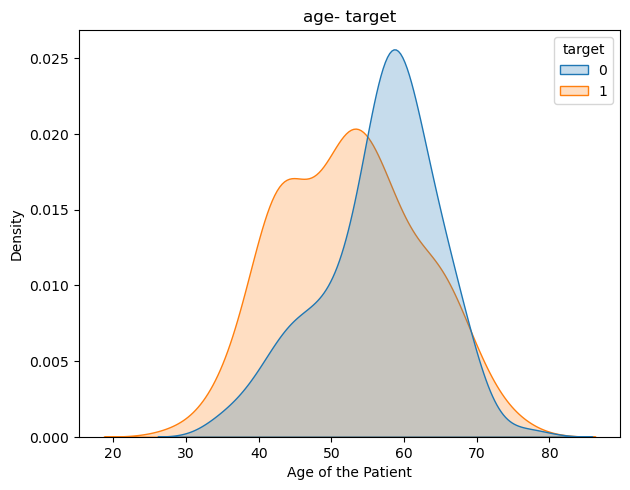

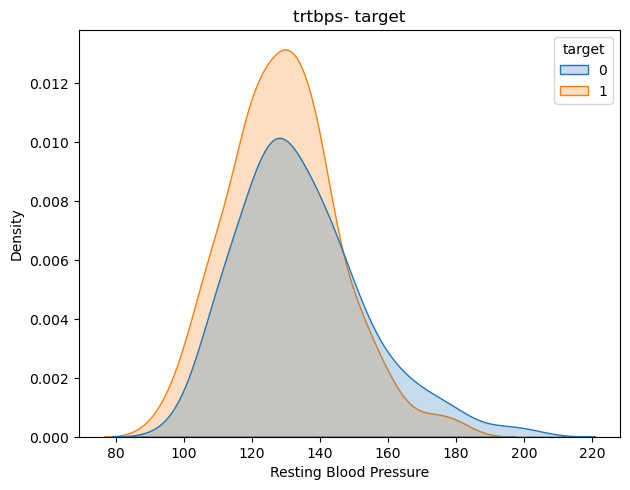

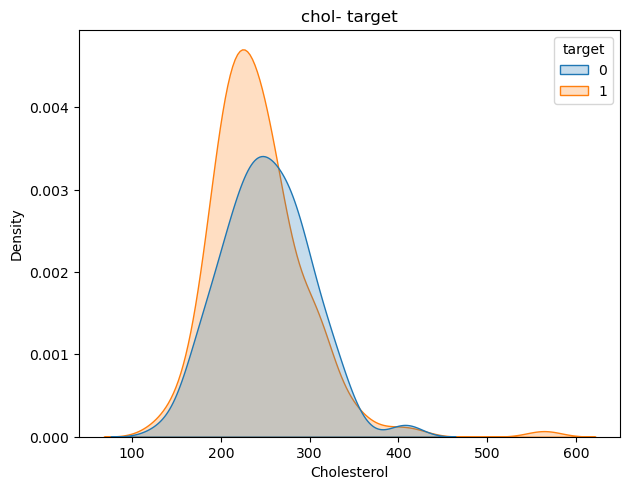

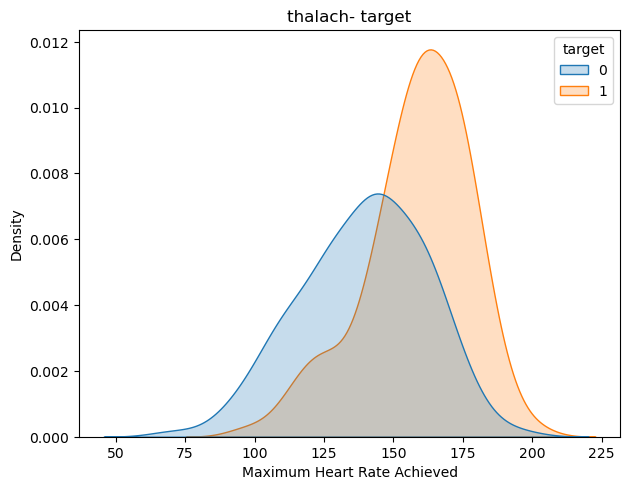

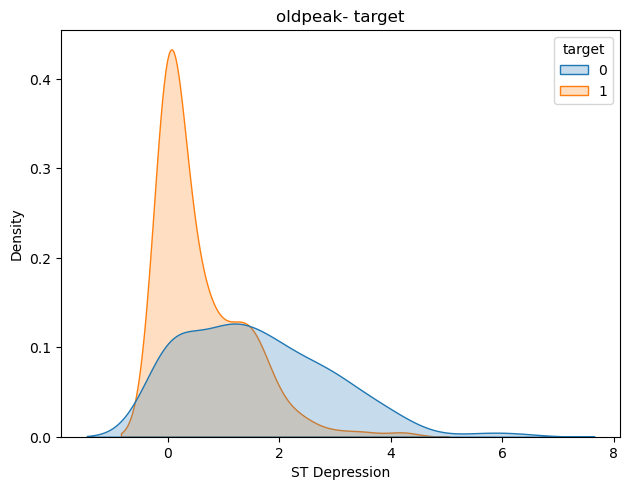

In [45]:
for numerical_feature in numeric_var:
    sns.kdeplot(dataset, x=dataset[numerical_feature], hue='target', fill=True)
    plt.xlabel(numeric_axis_map[numerical_feature])
    plt.tight_layout()
    plt.title(numerical_feature + '- target')
    plt.show()

In [46]:
dataset[numeric_var].corr()

age    trtbps      chol   thalach   oldpeak
age      1.000000  0.279351  0.213678 -0.398522  0.210013
trtbps   0.279351  1.000000  0.123174 -0.046698  0.193216
chol     0.213678  0.123174  1.000000 -0.009940  0.053952
thalach -0.398522 -0.046698 -0.009940  1.000000 -0.344187
oldpeak  0.210013  0.193216  0.053952 -0.344187  1.000000

<Axes: >

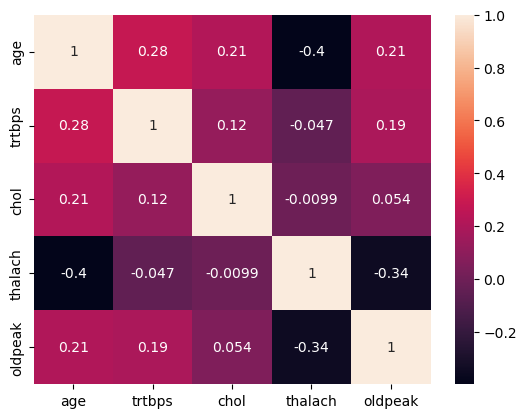

In [47]:
sns.heatmap(dataset[numeric_var].corr(), annot=True)

In [48]:
dataset[numeric_var].corr().iloc[:,[-1]]

oldpeak
age      0.210013
trtbps   0.193216
chol     0.053952
thalach -0.344187
oldpeak  1.000000

### Categorical variable - Target

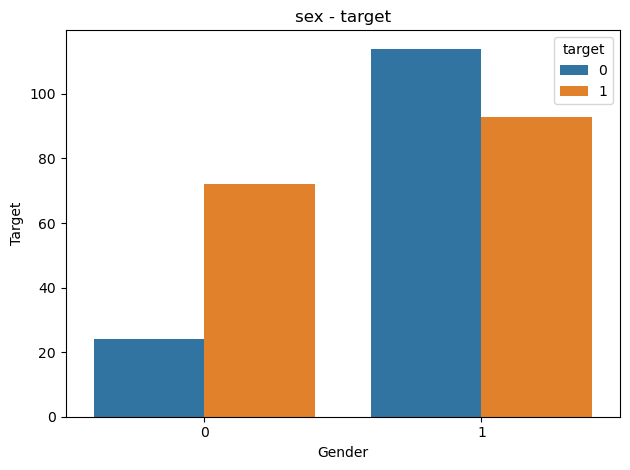

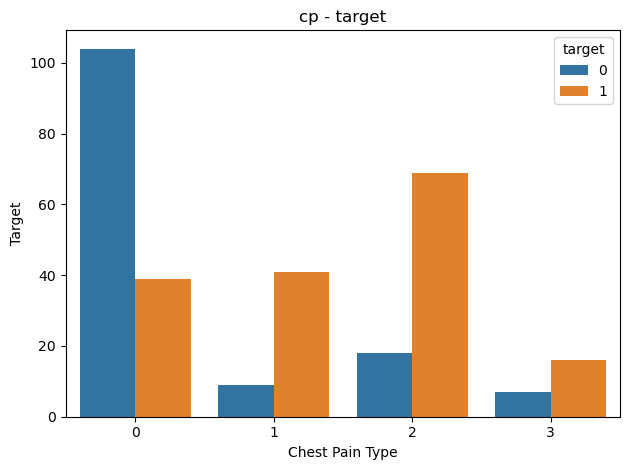

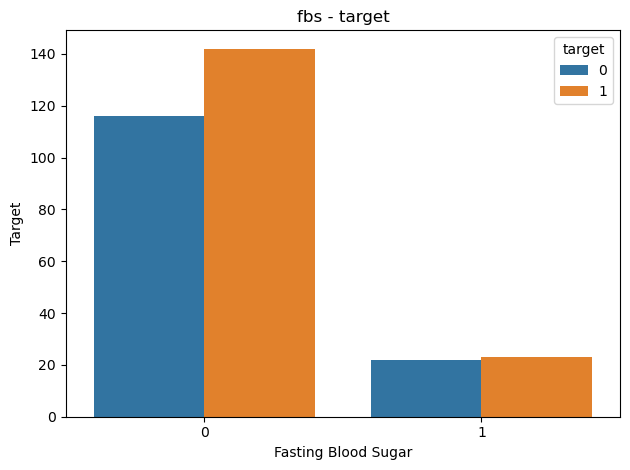

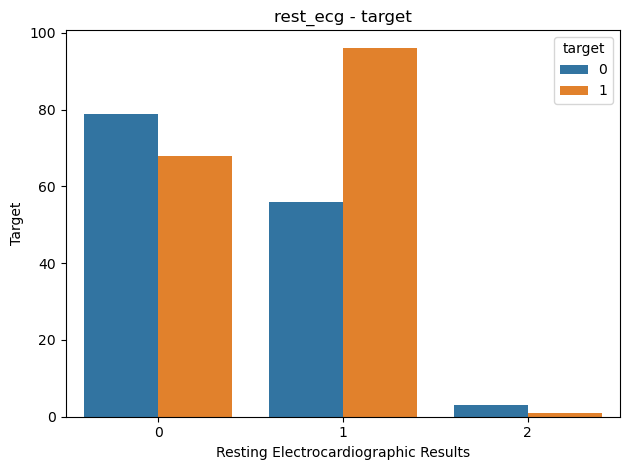

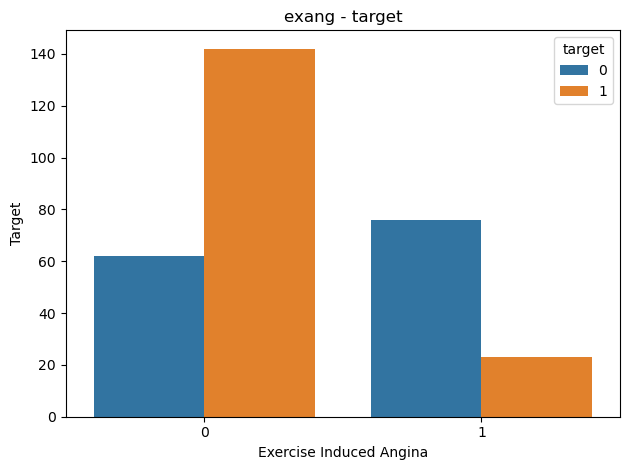

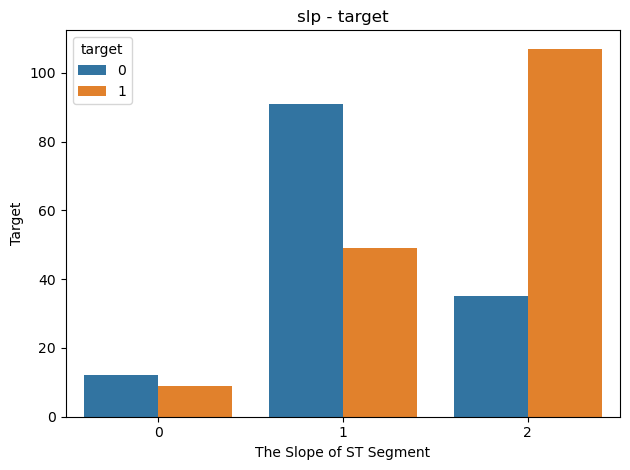

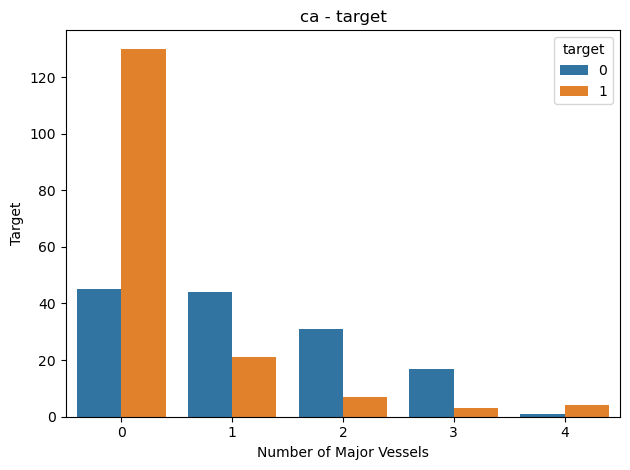

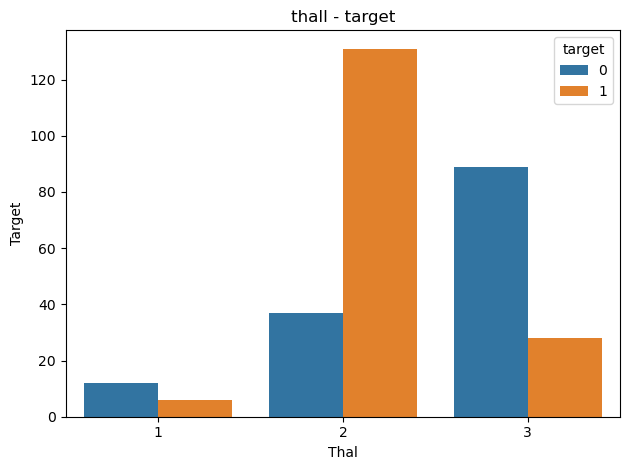

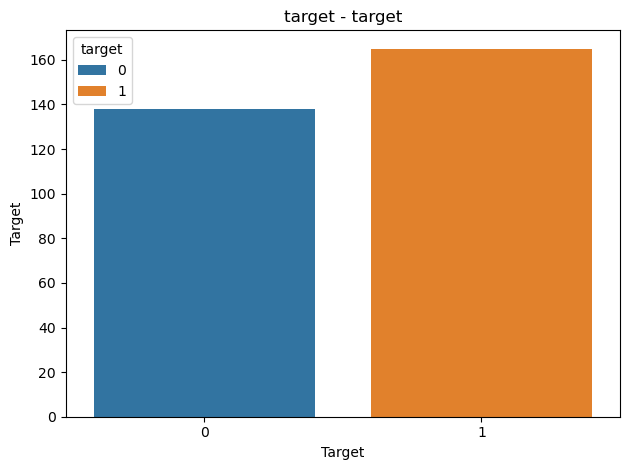

In [49]:
for categorical_feature in categorical_var:
    sns.countplot(dataset, x=dataset[categorical_feature], hue='target')
    plt.xlabel(categorical_axis_map[categorical_feature])
    plt.ylabel('Target')
    plt.title(categorical_feature + ' - target')
    plt.tight_layout()
    plt.show()

In [50]:
dataset[categorical_var].corr()

sex        cp       fbs  rest_ecg     exang       slp  \
sex       1.000000 -0.049353  0.045032 -0.058196  0.141664 -0.030711   
cp       -0.049353  1.000000  0.094444  0.044421 -0.394280  0.119717   
fbs       0.045032  0.094444  1.000000 -0.084189  0.025665 -0.059894   
rest_ecg -0.058196  0.044421 -0.084189  1.000000 -0.070733  0.093045   
exang     0.141664 -0.394280  0.025665 -0.070733  1.000000 -0.257748   
slp      -0.030711  0.119717 -0.059894  0.093045 -0.257748  1.000000   
ca        0.118261 -0.181053  0.137979 -0.072042  0.115739 -0.080155   
thall     0.211652 -0.169125 -0.011209 -0.013795  0.225508 -0.106310   
target   -0.280937  0.433798 -0.028046  0.137230 -0.436757  0.345877   

                ca     thall    target  
sex       0.118261  0.211652 -0.280937  
cp       -0.181053 -0.169125  0.433798  
fbs       0.137979 -0.011209 -0.028046  
rest_ecg -0.072042 -0.013795  0.137230  
exang     0.115739  0.225508 -0.436757  
slp      -0.080155 -0.106310  0.345877  
ca        1.000000  0.143248 -0.391724  
thall     0.143248  1.000000 -0.363322  
target   -0.391724 -0.363322  1.000000

In [51]:
dataset[categorical_var].corr().iloc[:,[-1]]

target
sex      -0.280937
cp        0.433798
fbs      -0.028046
rest_ecg  0.137230
exang    -0.436757
slp       0.345877
ca       -0.391724
thall    -0.363322
target    1.000000

### Examining numeric variables analysis with pair plot

In [52]:
# numeric_var.remove('target')

In [53]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

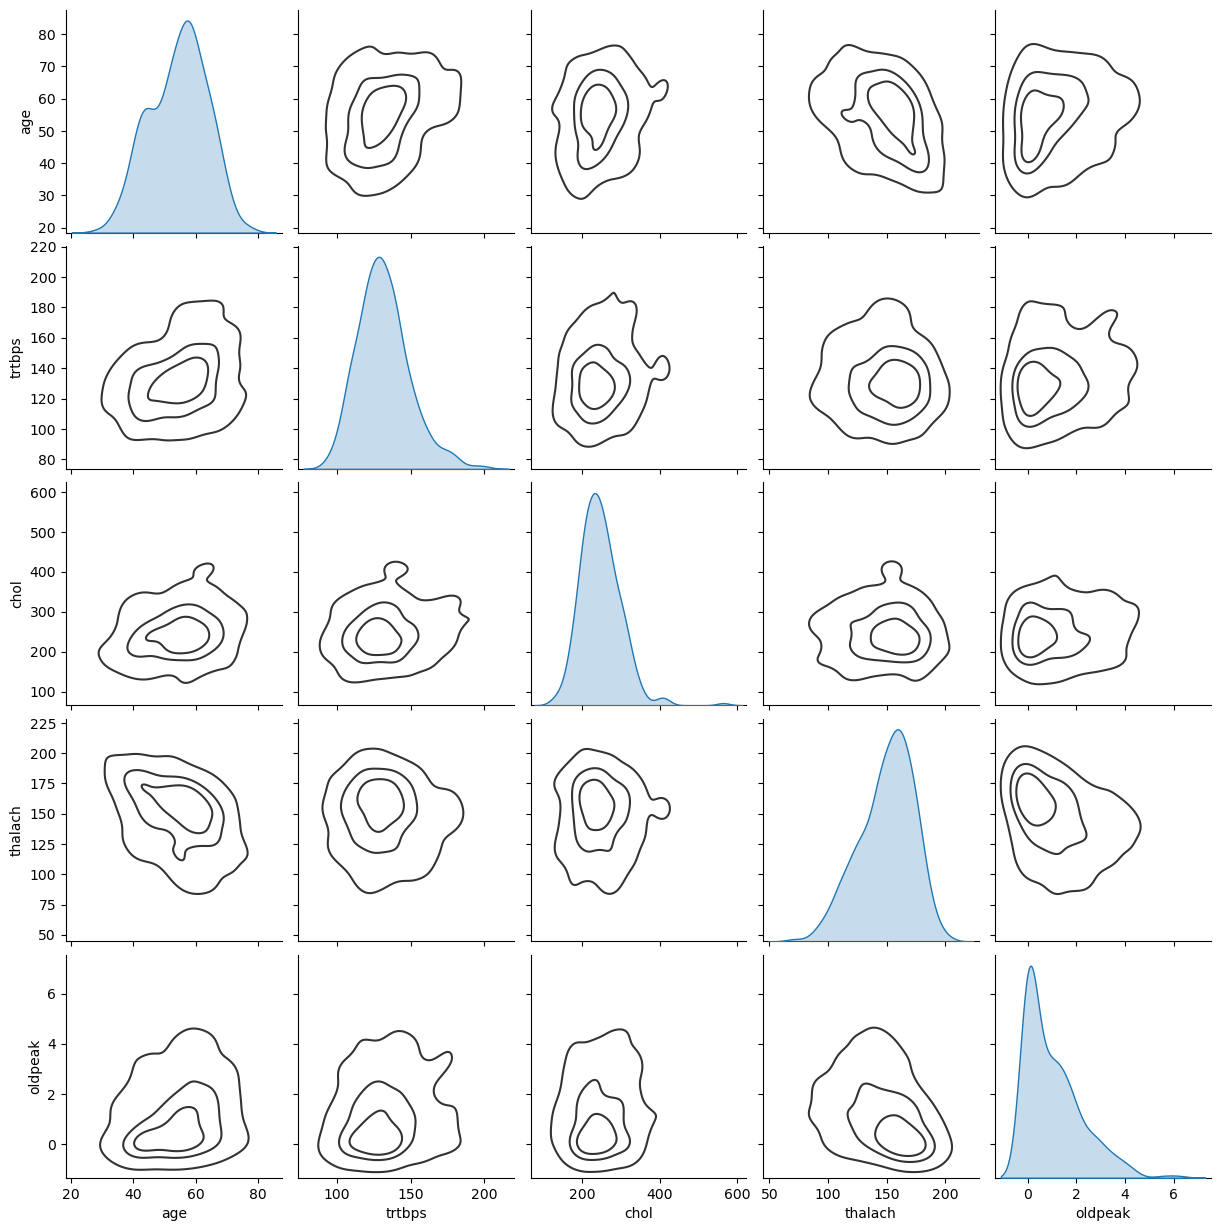

In [54]:
sns.pairplot(dataset[numeric_var], diag_kind='kde', plot_kws={"color": ".2", "levels": 4}, kind='kde')

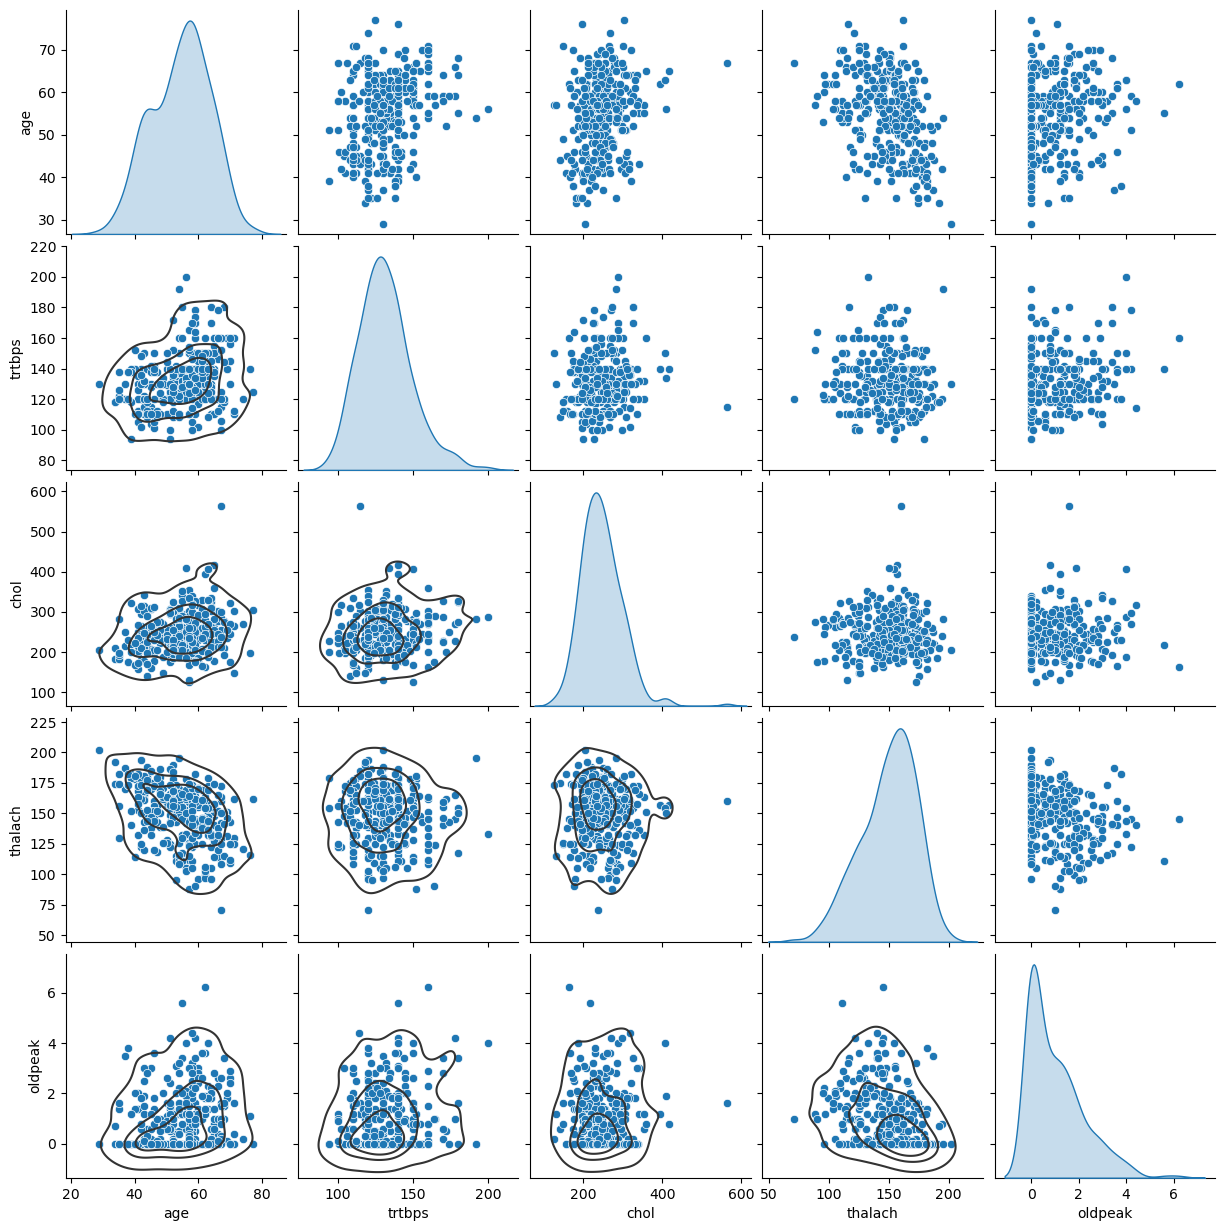

In [55]:
graph = sns.pairplot(dataset[numeric_var], diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels = 4, color = ".2")

## Feature scaling (robust scaler method)

In [56]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [57]:
scaled_data = robust_scaler.fit_transform(dataset[numeric_var])
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]],
      shape=(303, 5))

In [58]:
scaled_dataset = pd.DataFrame(scaled_data, columns=numeric_var)
scaled_dataset

age  trtbps      chol   thalach  oldpeak
0    0.592593    0.75 -0.110236 -0.092308   0.9375
1   -1.333333    0.00  0.157480  1.046154   1.6875
2   -1.037037    0.00 -0.566929  0.584615   0.3750
3    0.074074   -0.50 -0.062992  0.769231   0.0000
4    0.148148   -0.50  1.795276  0.307692  -0.1250
..        ...     ...       ...       ...      ...
298  0.148148    0.50  0.015748 -0.923077  -0.3750
299 -0.740741   -1.00  0.377953 -0.646154   0.2500
300  0.962963    0.70 -0.740157 -0.369231   1.6250
301  0.148148    0.00 -1.716535 -1.169231   0.2500
302  0.148148    0.00 -0.062992  0.646154  -0.5000

[303 rows x 5 columns]

### Melt function (act as pivot) for better visualization

In [59]:
scaled_dataset = pd.concat([scaled_dataset, dataset.loc[:, 'target']], axis=1)
scaled_dataset.head()

age  trtbps      chol   thalach  oldpeak  target
0  0.592593    0.75 -0.110236 -0.092308   0.9375       1
1 -1.333333    0.00  0.157480  1.046154   1.6875       1
2 -1.037037    0.00 -0.566929  0.584615   0.3750       1
3  0.074074   -0.50 -0.062992  0.769231   0.0000       1
4  0.148148   -0.50  1.795276  0.307692  -0.1250       1

In [60]:
melted_dataset = pd.melt(scaled_dataset, id_vars = 'target', var_name='variables', value_name='value')
melted_dataset

target variables     value
0          1       age  0.592593
1          1       age -1.333333
2          1       age -1.037037
3          1       age  0.074074
4          1       age  0.148148
...      ...       ...       ...
1510       0   oldpeak -0.375000
1511       0   oldpeak  0.250000
1512       0   oldpeak  1.625000
1513       0   oldpeak  0.250000
1514       0   oldpeak -0.500000

[1515 rows x 3 columns]

/opt/anaconda3/envs/ds_env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/ds_env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 28.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='variables', ylabel='value'>

/opt/anaconda3/envs/ds_env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/ds_env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


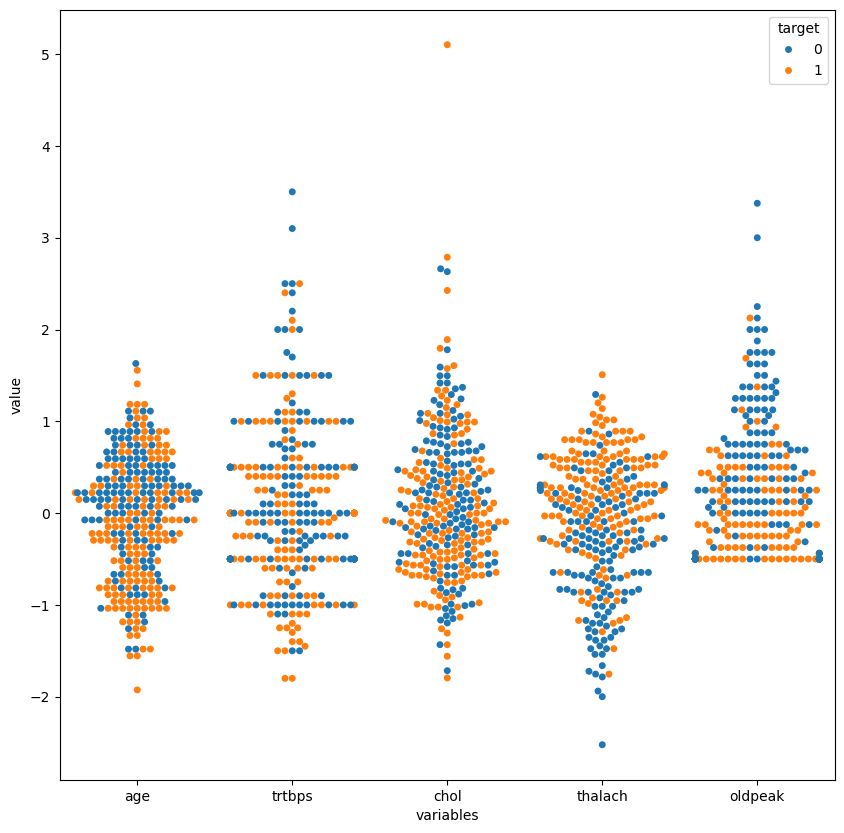

In [61]:
plt.figure(figsize=(10,10))
sns.swarmplot(data=melted_dataset, x='variables', y='value', hue='target')

### Numerical - Categorical Variables Analysis (Swarmplot)

In [62]:
scaled_dataset.drop(columns='target', inplace=True)

In [63]:
scaled_dataset

age  trtbps      chol   thalach  oldpeak
0    0.592593    0.75 -0.110236 -0.092308   0.9375
1   -1.333333    0.00  0.157480  1.046154   1.6875
2   -1.037037    0.00 -0.566929  0.584615   0.3750
3    0.074074   -0.50 -0.062992  0.769231   0.0000
4    0.148148   -0.50  1.795276  0.307692  -0.1250
..        ...     ...       ...       ...      ...
298  0.148148    0.50  0.015748 -0.923077  -0.3750
299 -0.740741   -1.00  0.377953 -0.646154   0.2500
300  0.962963    0.70 -0.740157 -0.369231   1.6250
301  0.148148    0.00 -1.716535 -1.169231   0.2500
302  0.148148    0.00 -0.062992  0.646154  -0.5000

[303 rows x 5 columns]

/opt/anaconda3/envs/ds_env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/ds_env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 23.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/ds_env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/ds_env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 23.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/ds_env/lib/python3.12/site-package

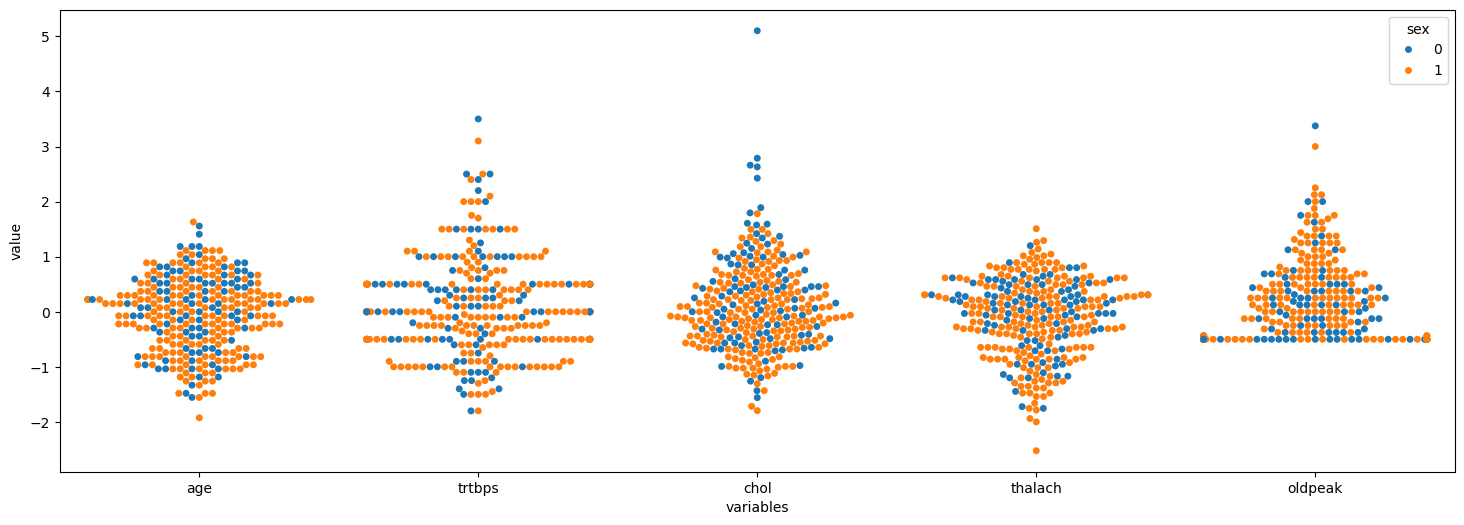

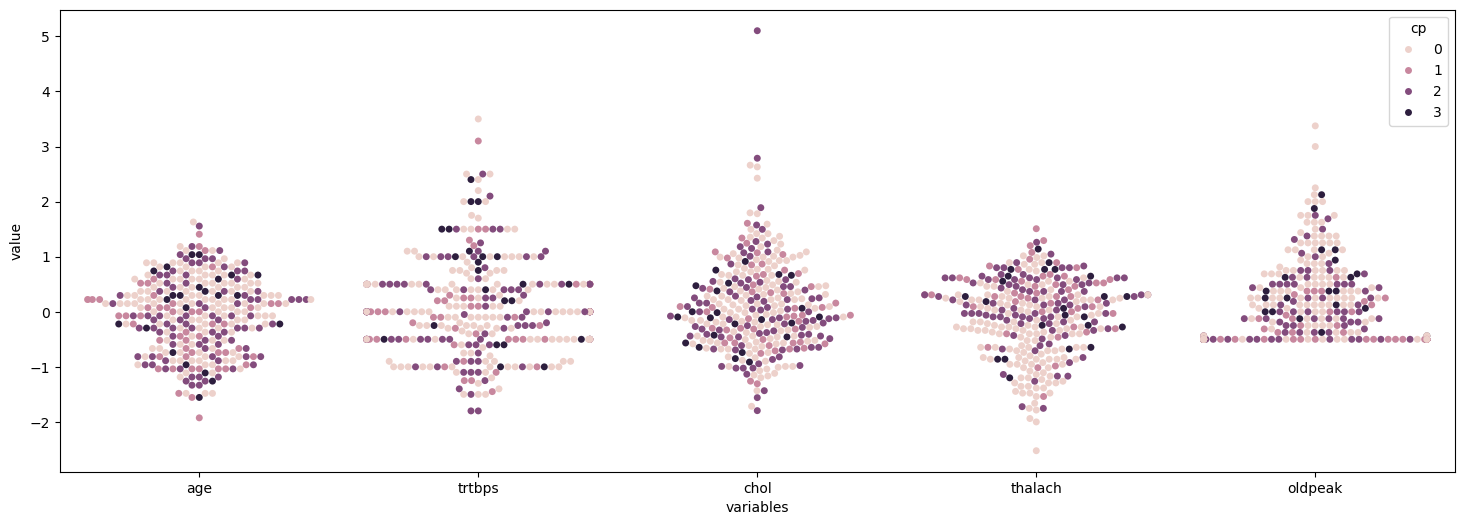

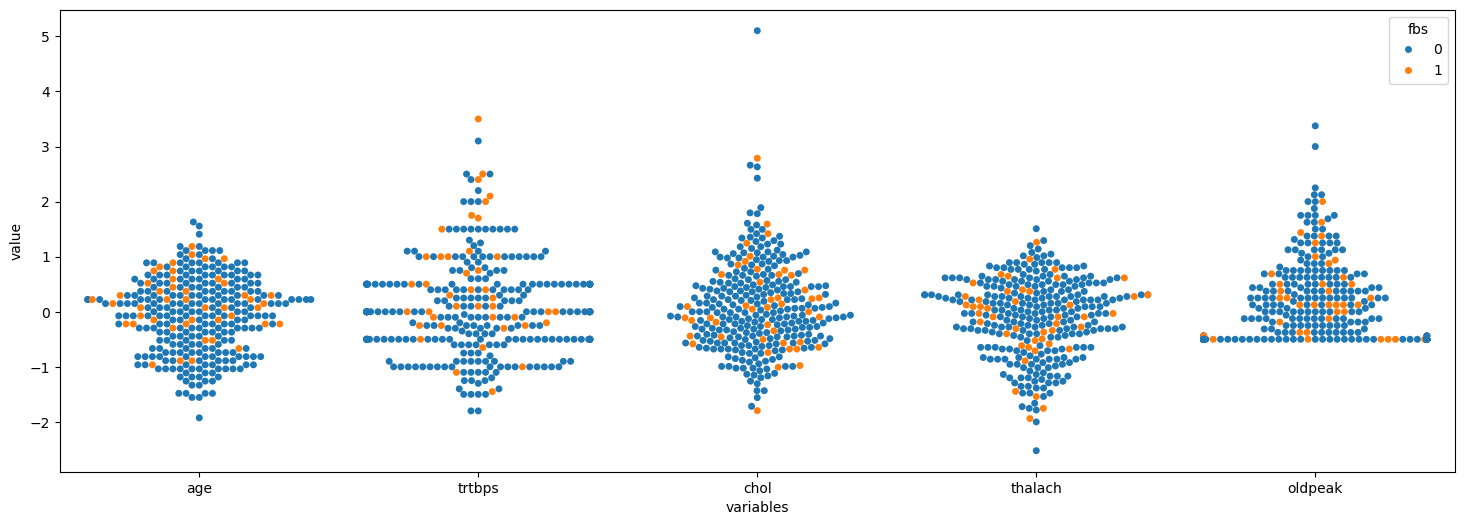

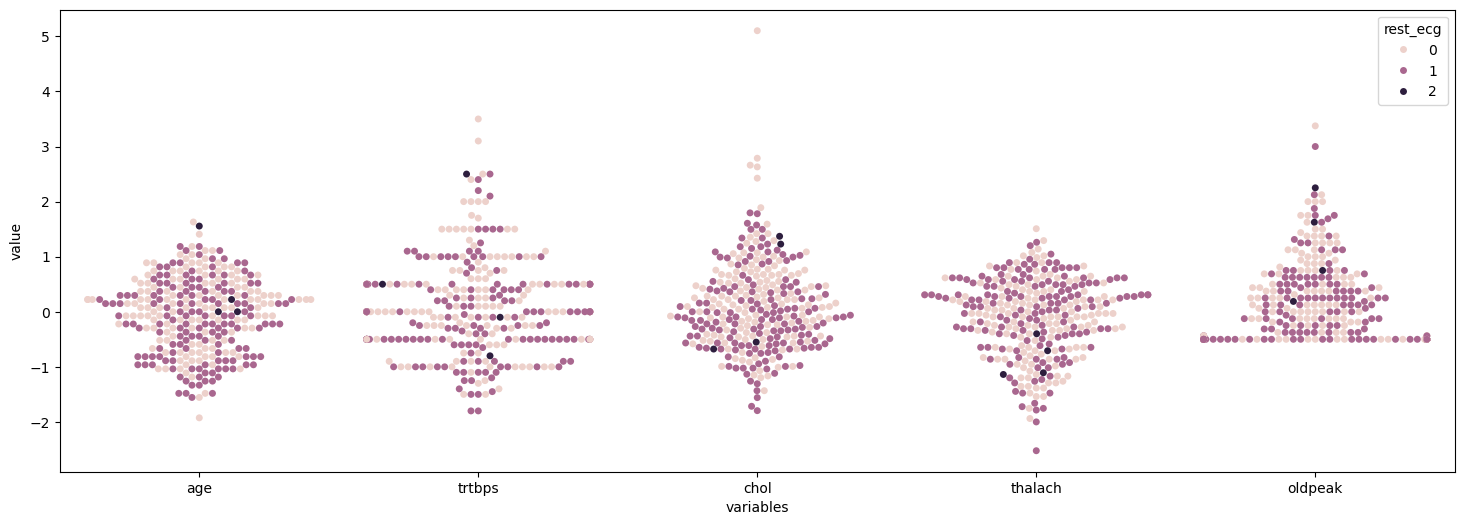

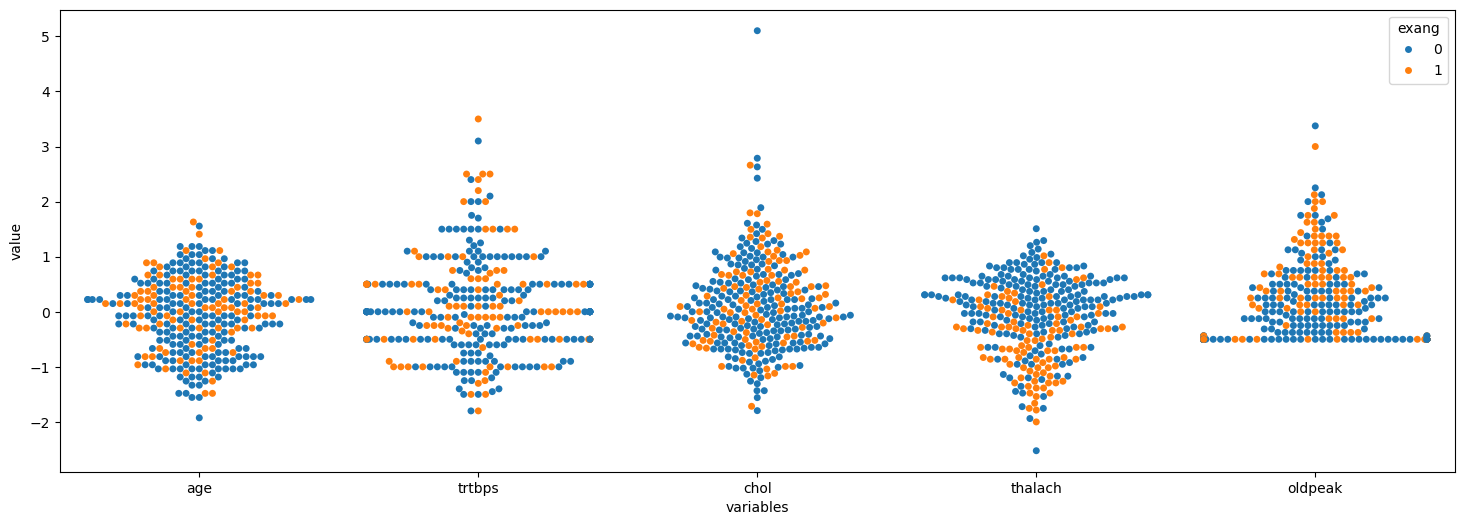

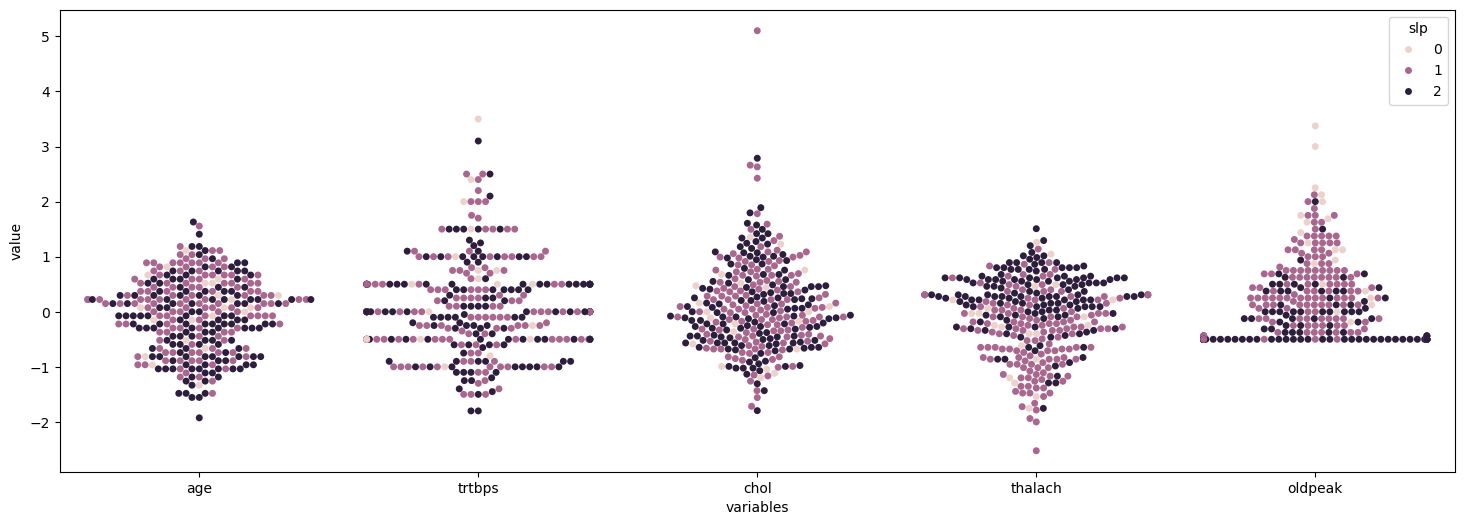

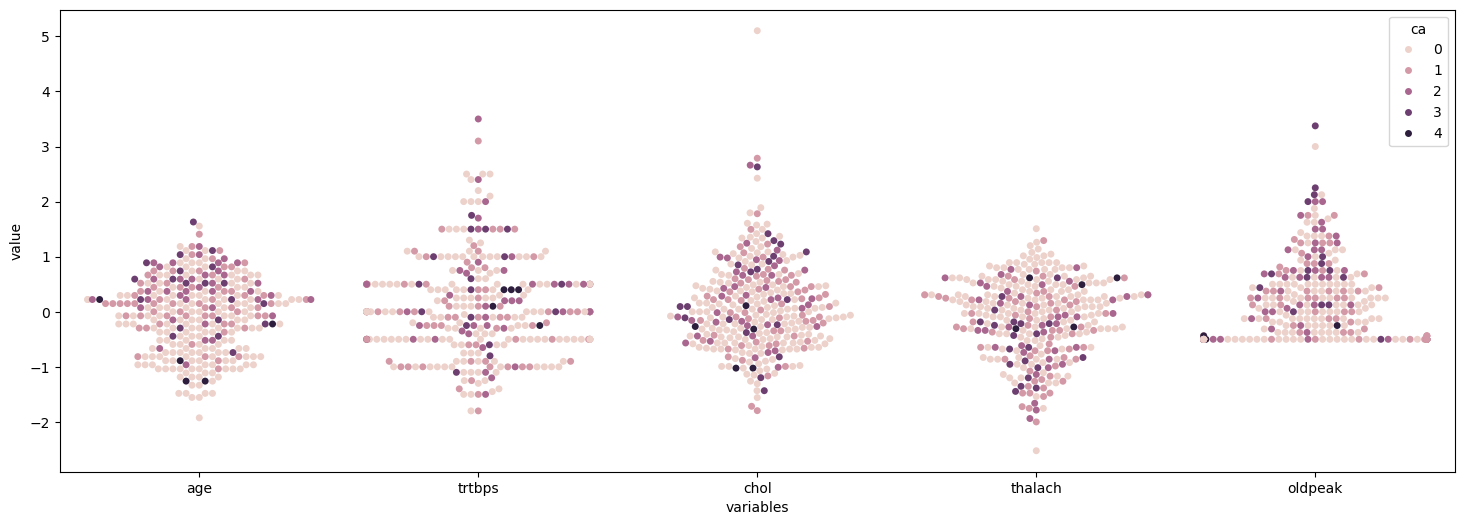

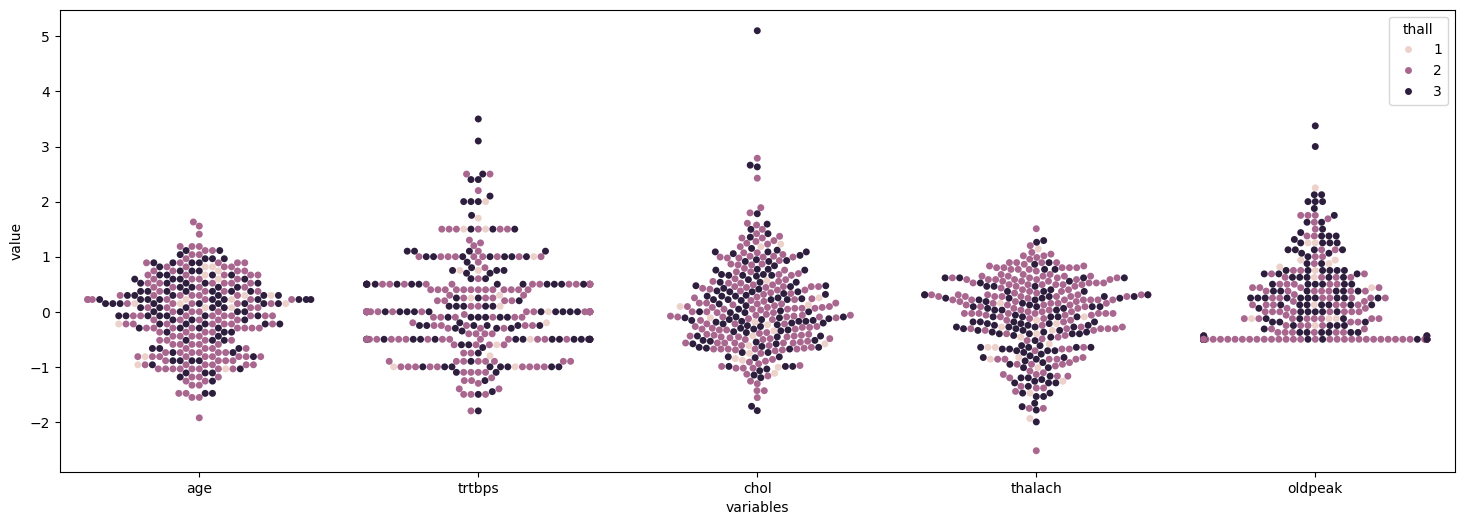

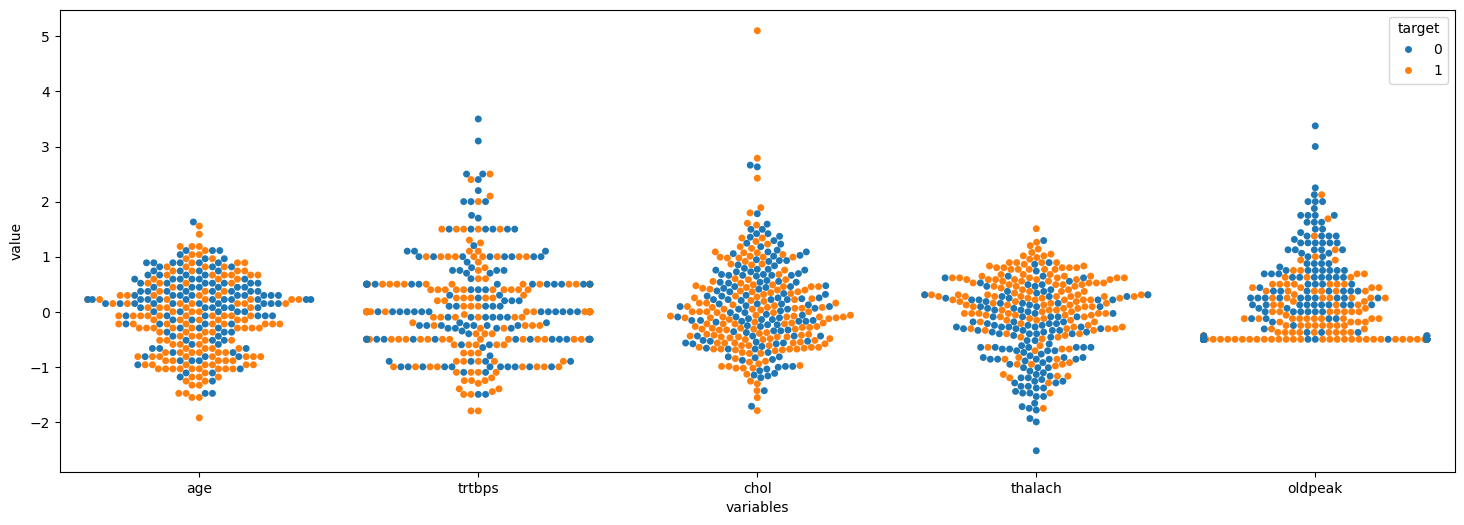

In [64]:
for i in dataset[categorical_var]:
    df_new = pd.concat([scaled_dataset, dataset.loc[:, i]], axis=1)
    melted_dataset = pd.melt(df_new, id_vars = i, var_name='variables', value_name='value')
    plt.figure(figsize=(18,6))
    sns.swarmplot(x='variables', y='value', hue = i, data=melted_dataset)

### Numerical - Categorical Variables Analysis (Boxplot)

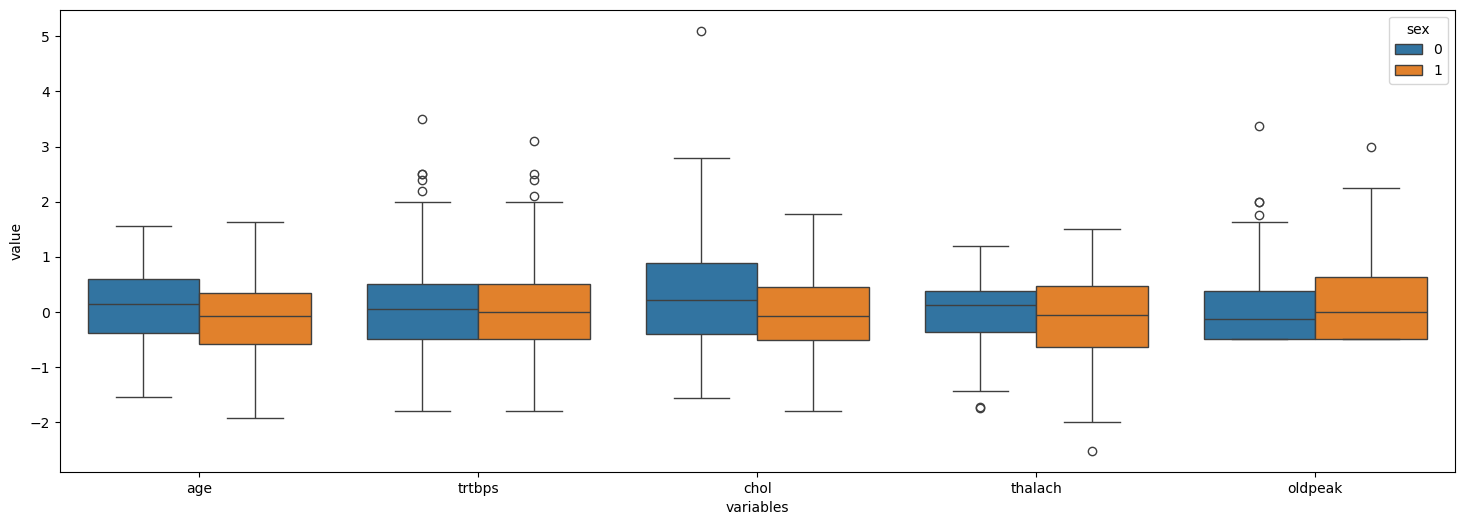

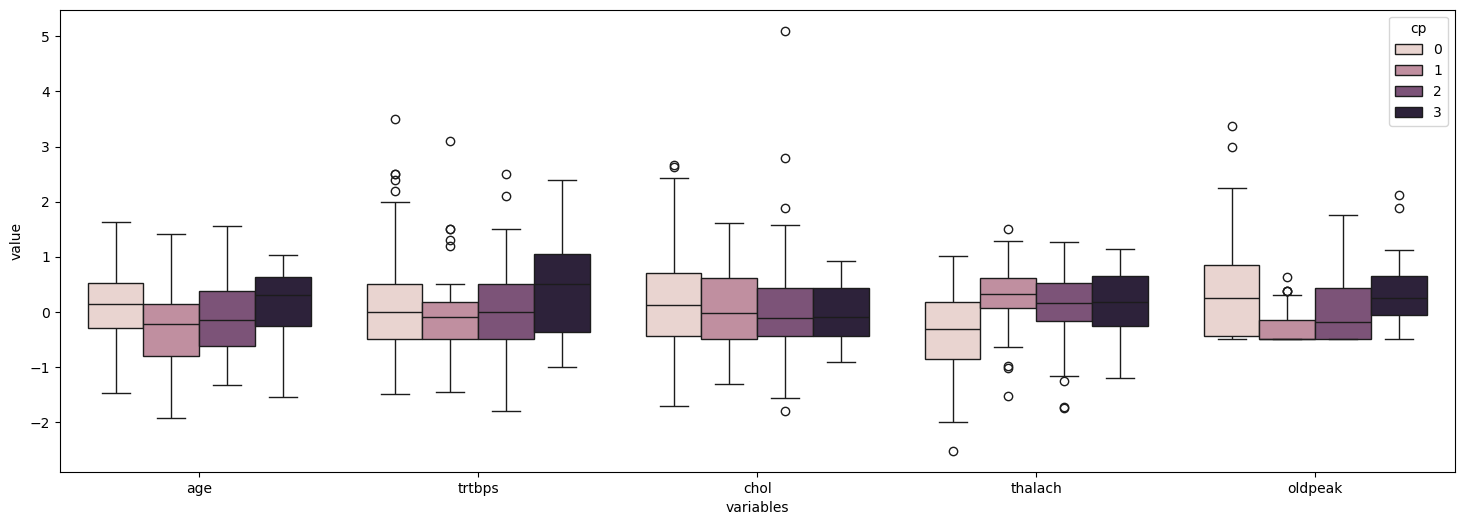

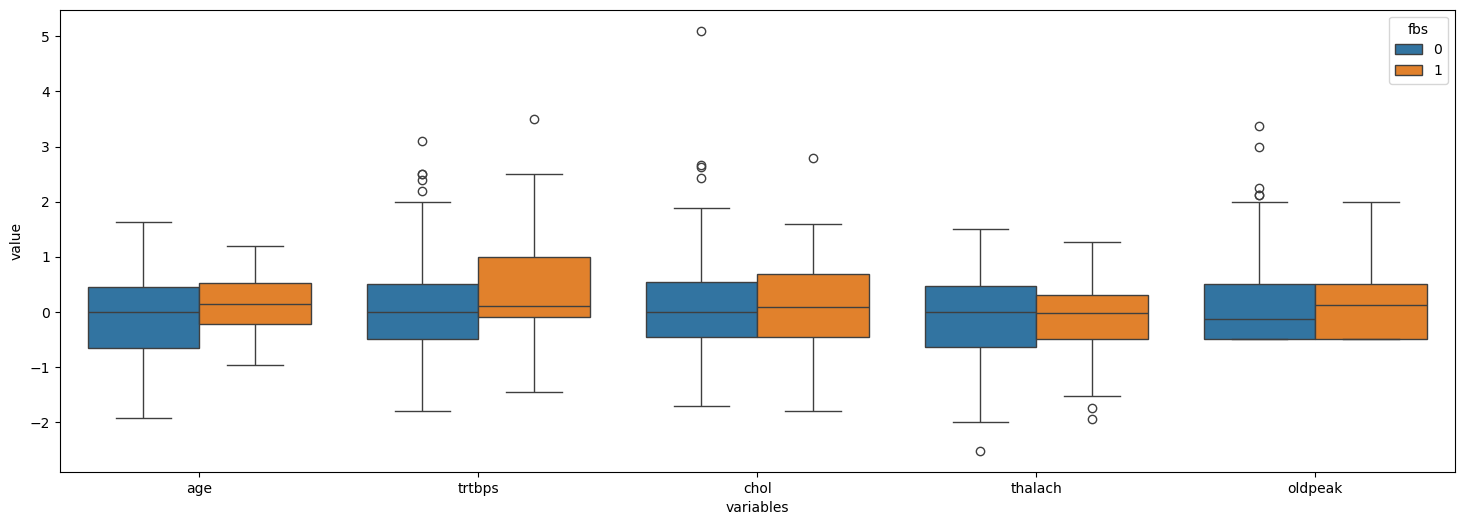

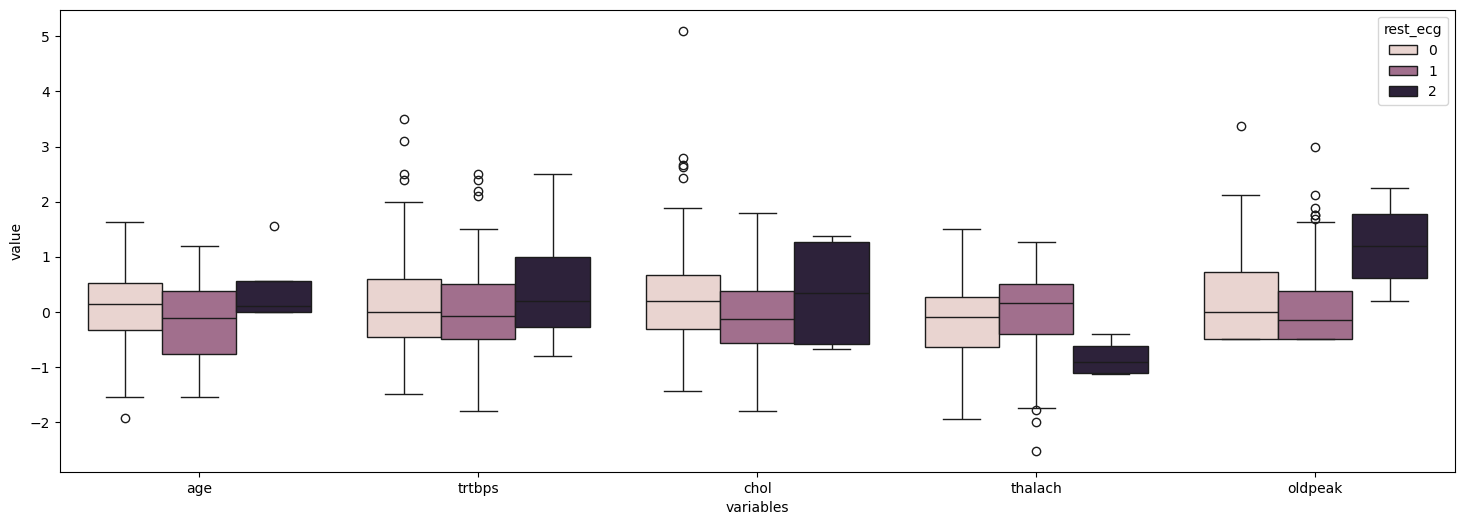

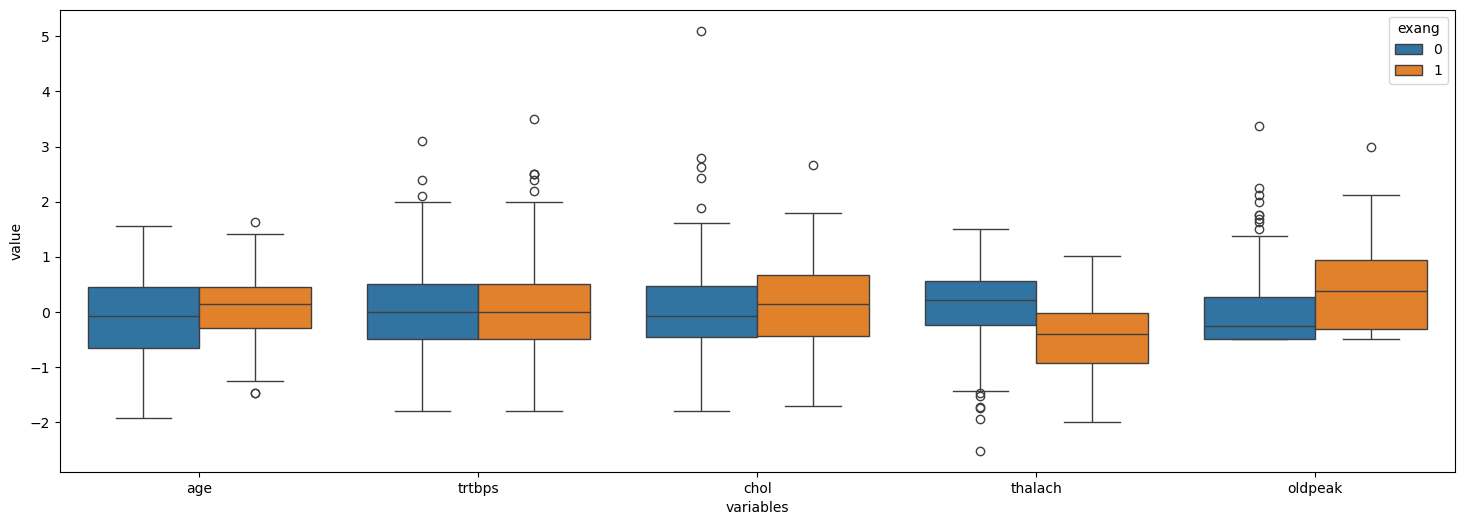

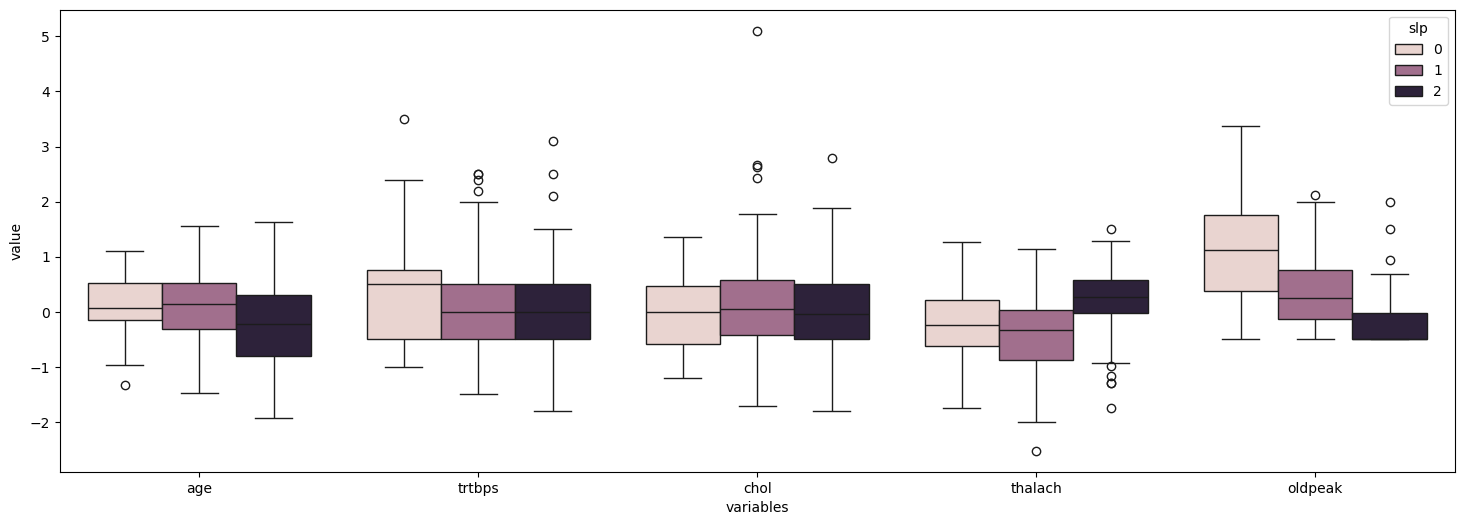

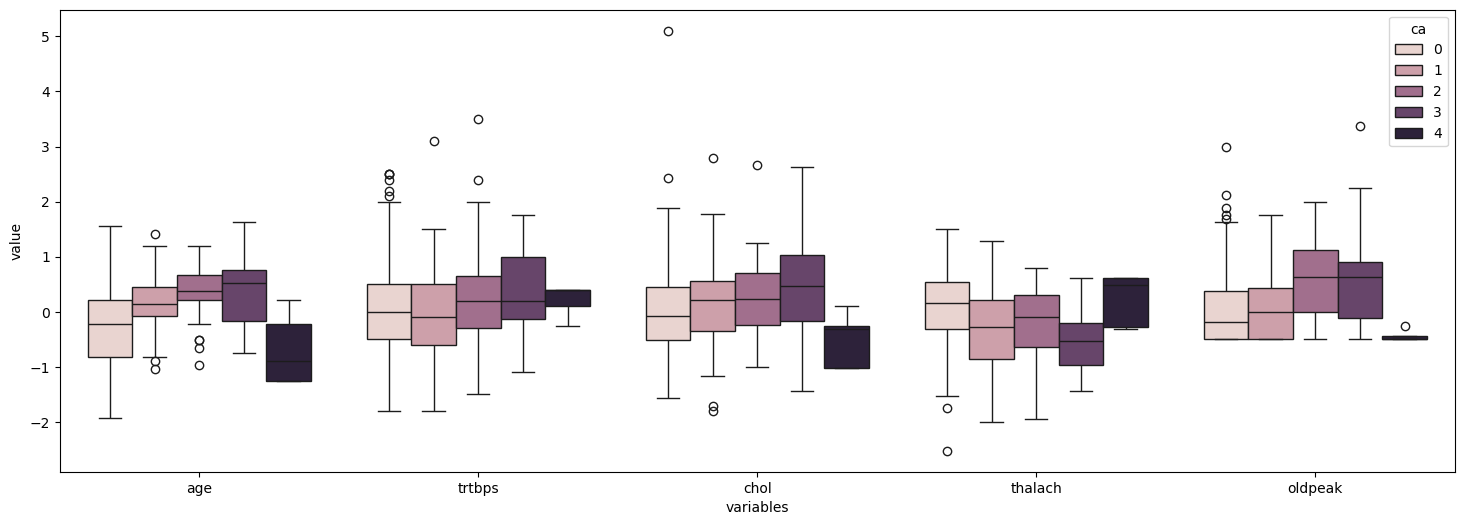

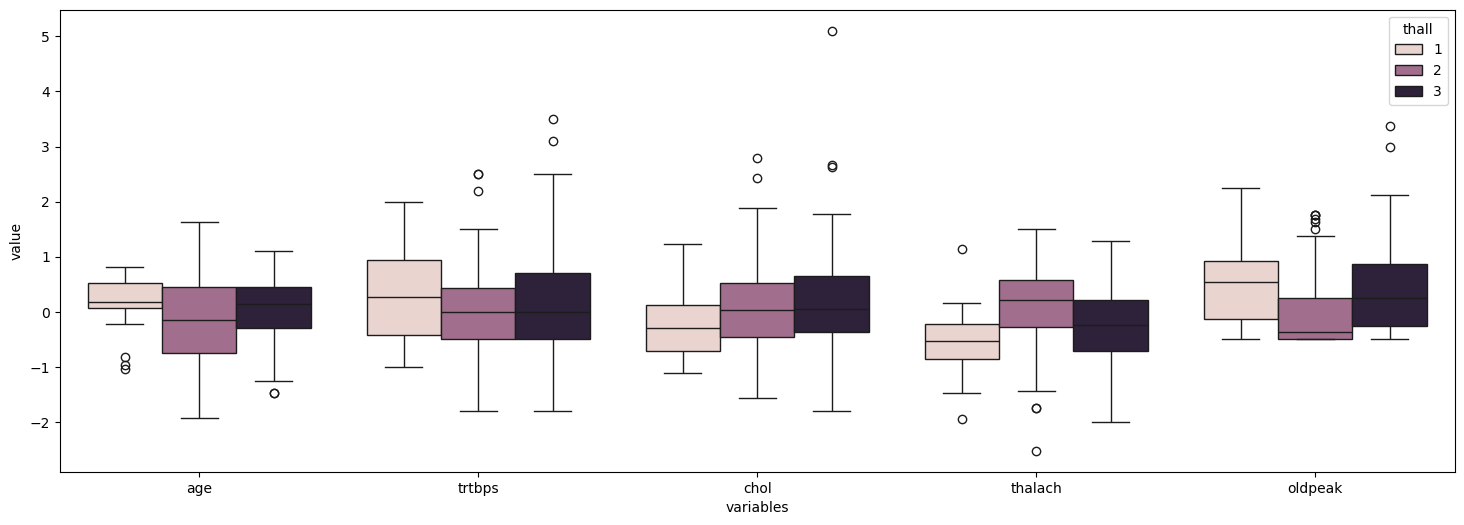

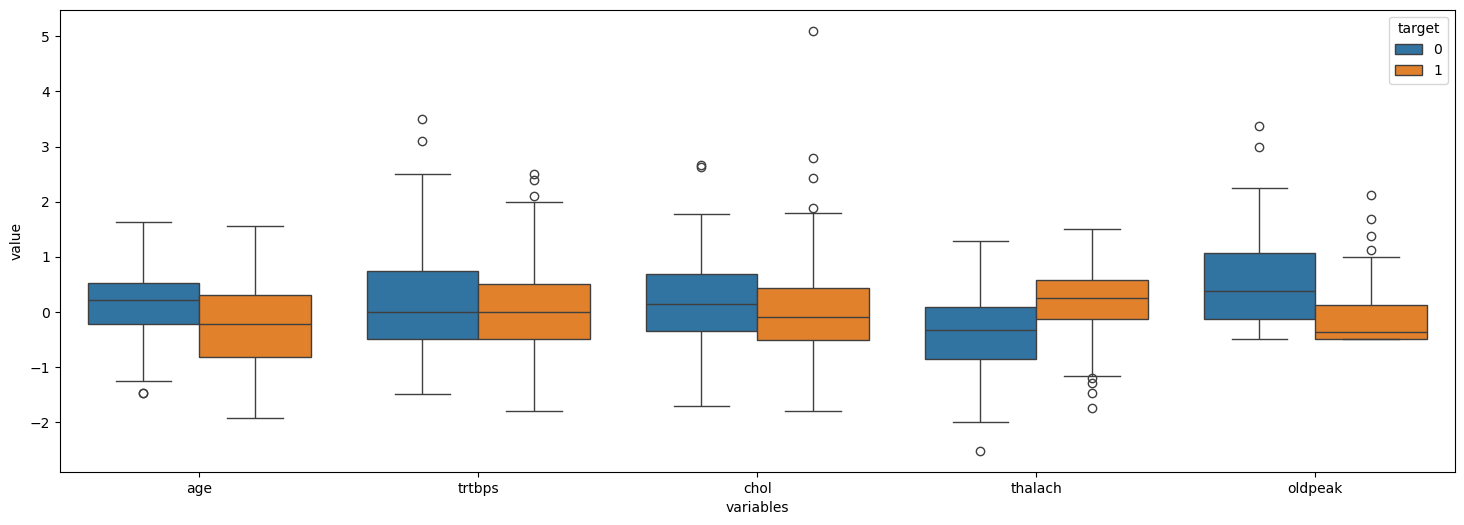

In [65]:
for i in dataset[categorical_var]:
    df_new = pd.concat([scaled_dataset, dataset.loc[:, i]], axis=1)
    melted_dataset = pd.melt(df_new, id_vars = i, var_name='variables', value_name='value')
    plt.figure(figsize=(18,6))
    sns.boxplot(x='variables', y='value', hue = i, data=melted_dataset)

### Numerical - Categorical Variables Analysis (Heatmap)

In [66]:
scaled_dataset

age  trtbps      chol   thalach  oldpeak
0    0.592593    0.75 -0.110236 -0.092308   0.9375
1   -1.333333    0.00  0.157480  1.046154   1.6875
2   -1.037037    0.00 -0.566929  0.584615   0.3750
3    0.074074   -0.50 -0.062992  0.769231   0.0000
4    0.148148   -0.50  1.795276  0.307692  -0.1250
..        ...     ...       ...       ...      ...
298  0.148148    0.50  0.015748 -0.923077  -0.3750
299 -0.740741   -1.00  0.377953 -0.646154   0.2500
300  0.962963    0.70 -0.740157 -0.369231   1.6250
301  0.148148    0.00 -1.716535 -1.169231   0.2500
302  0.148148    0.00 -0.062992  0.646154  -0.5000

[303 rows x 5 columns]

In [67]:
df_new2 = pd.concat([scaled_dataset, dataset[categorical_var]], axis=1)
df_new2

age  trtbps      chol   thalach  oldpeak  sex  cp  fbs  rest_ecg  \
0    0.592593    0.75 -0.110236 -0.092308   0.9375    1   3    1         0   
1   -1.333333    0.00  0.157480  1.046154   1.6875    1   2    0         1   
2   -1.037037    0.00 -0.566929  0.584615   0.3750    0   1    0         0   
3    0.074074   -0.50 -0.062992  0.769231   0.0000    1   1    0         1   
4    0.148148   -0.50  1.795276  0.307692  -0.1250    0   0    0         1   
..        ...     ...       ...       ...      ...  ...  ..  ...       ...   
298  0.148148    0.50  0.015748 -0.923077  -0.3750    0   0    0         1   
299 -0.740741   -1.00  0.377953 -0.646154   0.2500    1   3    0         1   
300  0.962963    0.70 -0.740157 -0.369231   1.6250    1   0    1         1   
301  0.148148    0.00 -1.716535 -1.169231   0.2500    1   0    0         1   
302  0.148148    0.00 -0.062992  0.646154  -0.5000    0   1    0         0   

     exang  slp  ca  thall  target  
0        0    0   0      1       1  
1        0    0   0      2       1  
2        0    2   0      2       1  
3        0    2   0      2       1  
4        1    2   0      2       1  
..     ...  ...  ..    ...     ...  
298      1    1   0      3       0  
299      0    1   0      3       0  
300      0    1   2      3       0  
301      1    1   1      3       0  
302      0    1   1      2       0  

[303 rows x 14 columns]

In [68]:
df_new2.corr()

age    trtbps      chol   thalach   oldpeak       sex  \
age       1.000000  0.279351  0.213678 -0.398522  0.210013 -0.098447   
trtbps    0.279351  1.000000  0.123174 -0.046698  0.193216 -0.056769   
chol      0.213678  0.123174  1.000000 -0.009940  0.053952 -0.197912   
thalach  -0.398522 -0.046698 -0.009940  1.000000 -0.344187 -0.044020   
oldpeak   0.210013  0.193216  0.053952 -0.344187  1.000000  0.096093   
sex      -0.098447 -0.056769 -0.197912 -0.044020  0.096093  1.000000   
cp       -0.068653  0.047608 -0.076904  0.295762 -0.149230 -0.049353   
fbs       0.121308  0.177531  0.013294 -0.008567  0.005747  0.045032   
rest_ecg -0.116211 -0.114103 -0.151040  0.044123 -0.058770 -0.058196   
exang     0.096801  0.067616  0.067023 -0.378812  0.288223  0.141664   
slp      -0.168814 -0.121475 -0.004038  0.386784 -0.577537 -0.030711   
ca        0.276326  0.101389  0.070511 -0.213177  0.222682  0.118261   
thall     0.066745  0.060638  0.087866 -0.115310  0.210236  0.211652   
target   -0.225439 -0.144931 -0.085239  0.421741 -0.430696 -0.280937   

                cp       fbs  rest_ecg     exang       slp        ca  \
age      -0.068653  0.121308 -0.116211  0.096801 -0.168814  0.276326   
trtbps    0.047608  0.177531 -0.114103  0.067616 -0.121475  0.101389   
chol     -0.076904  0.013294 -0.151040  0.067023 -0.004038  0.070511   
thalach   0.295762 -0.008567  0.044123 -0.378812  0.386784 -0.213177   
oldpeak  -0.149230  0.005747 -0.058770  0.288223 -0.577537  0.222682   
sex      -0.049353  0.045032 -0.058196  0.141664 -0.030711  0.118261   
cp        1.000000  0.094444  0.044421 -0.394280  0.119717 -0.181053   
fbs       0.094444  1.000000 -0.084189  0.025665 -0.059894  0.137979   
rest_ecg  0.044421 -0.084189  1.000000 -0.070733  0.093045 -0.072042   
exang    -0.394280  0.025665 -0.070733  1.000000 -0.257748  0.115739   
slp       0.119717 -0.059894  0.093045 -0.257748  1.000000 -0.080155   
ca       -0.181053  0.137979 -0.072042  0.115739 -0.080155  1.000000   
thall    -0.169125 -0.011209 -0.013795  0.225508 -0.106310  0.143248   
target    0.433798 -0.028046  0.137230 -0.436757  0.345877 -0.391724   

             thall    target  
age       0.066745 -0.225439  
trtbps    0.060638 -0.144931  
chol      0.087866 -0.085239  
thalach  -0.115310  0.421741  
oldpeak   0.210236 -0.430696  
sex       0.211652 -0.280937  
cp       -0.169125  0.433798  
fbs      -0.011209 -0.028046  
rest_ecg -0.013795  0.137230  
exang     0.225508 -0.436757  
slp      -0.106310  0.345877  
ca        0.143248 -0.391724  
thall     1.000000 -0.363322  
target   -0.363322  1.000000

<Axes: >

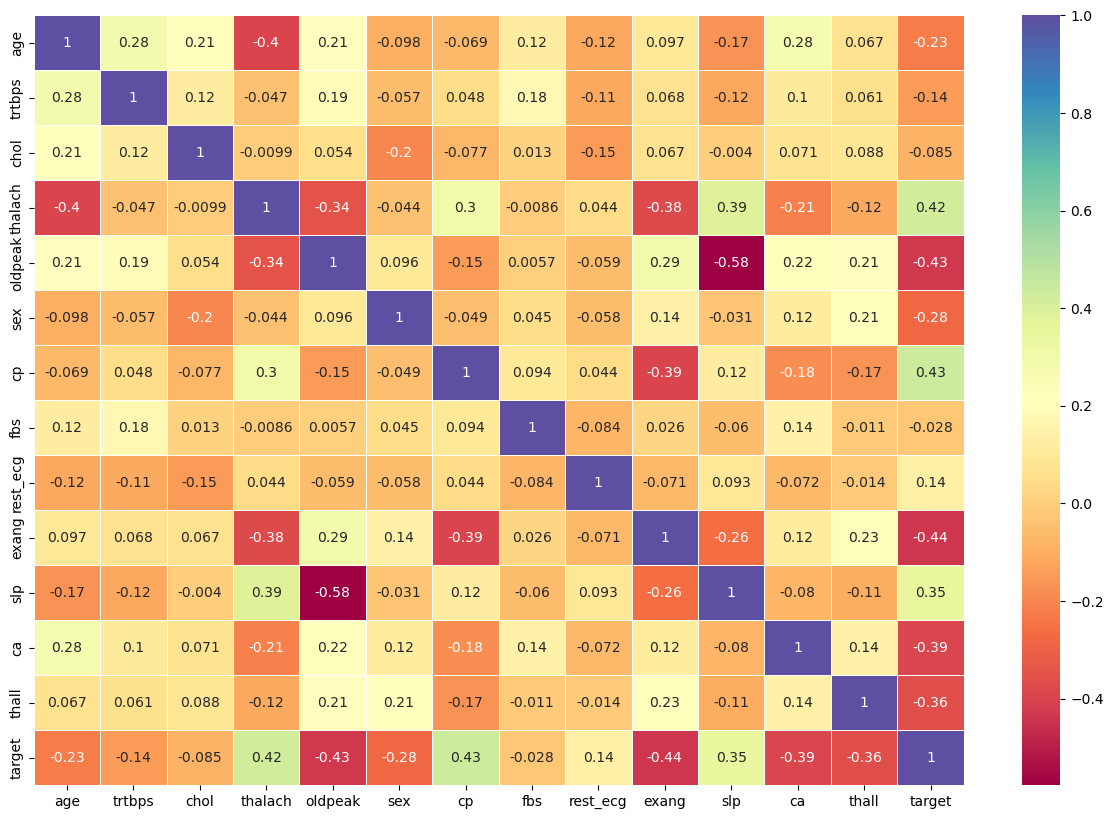

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df_new2.corr(), annot=True, cmap='Spectral', linewidths=0.5)

## Preparation for modeling

### Removing low correlation columns

In [70]:
dataset.drop(['chol', 'fbs', 'rest_ecg'], inplace=True, axis=1)
dataset

age  sex  cp  trtbps  thalach  exang  oldpeak  slp  ca  thall  target
0     63    1   3     145      150      0      2.3    0   0      1       1
1     37    1   2     130      187      0      3.5    0   0      2       1
2     41    0   1     130      172      0      1.4    2   0      2       1
3     56    1   1     120      178      0      0.8    2   0      2       1
4     57    0   0     120      163      1      0.6    2   0      2       1
..   ...  ...  ..     ...      ...    ...      ...  ...  ..    ...     ...
298   57    0   0     140      123      1      0.2    1   0      3       0
299   45    1   3     110      132      0      1.2    1   0      3       0
300   68    1   0     144      141      0      3.4    1   2      3       0
301   57    1   0     130      115      1      1.2    1   1      3       0
302   57    0   1     130      174      0      0.0    1   1      2       0

[303 rows x 11 columns]

### Visualizing outliers

Text(0.5, 1.0, 'oldpeak')

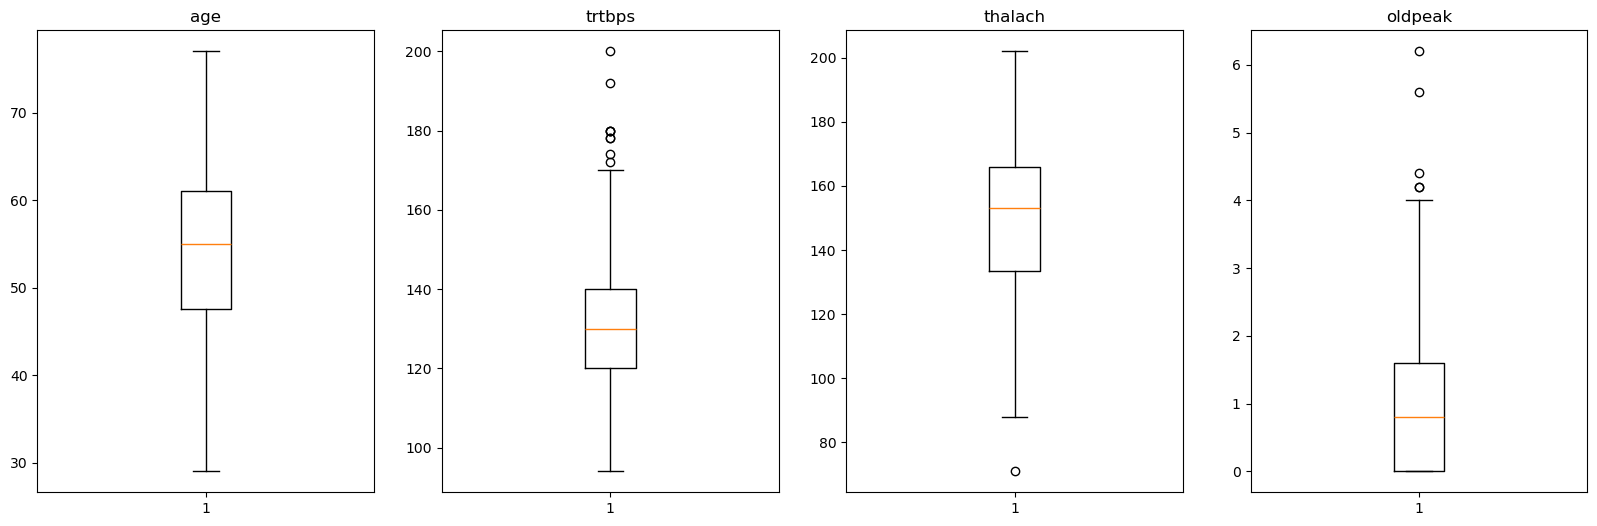

In [71]:
fig, ax = plt.subplots(1, 4, figsize=(20,6))

ax[0].boxplot(dataset['age'])
ax[0].set_title('age')

ax[1].boxplot(dataset['trtbps'])
ax[1].set_title('trtbps')

ax[2].boxplot(dataset['thalach'])
ax[2].set_title('thalach')

ax[3].boxplot(dataset['oldpeak'])
ax[3].set_title('oldpeak')

### Dealing with outliers (trtbps)

In [72]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [73]:
z_score_trtbps = zscore(dataset['trtbps'])
for threshold in range(1, 4):
    print("Threshold value : {}".format(threshold))
    print('Number of outlier: {}'.format(len(np.where(z_score_trtbps > threshold)[0])))
    print('--------')

Threshold value : 1
Number of outlier: 51
--------
Threshold value : 2
Number of outlier: 13
--------
Threshold value : 3
Number of outlier: 2
--------


In [74]:
len(np.where(z_score_trtbps > 1)[0])

51

In [75]:
np.where(z_score_trtbps > 1)[0]

array([  8,   9,  14,  17,  18,  23,  25,  26,  37,  38,  39,  83, 101,
       106, 110, 111, 127, 130, 145, 147, 150, 152, 165, 179, 181, 184,
       195, 196, 202, 203, 204, 207, 220, 223, 228, 231, 232, 240, 241,
       243, 247, 248, 254, 258, 260, 266, 283, 287, 292, 293, 297])

In [76]:
dataset[z_score_trtbps > 2][['trtbps']]

trtbps
8       172
101     178
110     180
152     170
195     170
203     180
223     200
228     170
241     174
248     192
260     178
266     180
292     170

### Handle the outliers trtbps variable using winsorize

In [77]:
dataset[z_score_trtbps > 2][['trtbps']].min()

trtbps    170
dtype: int64

In [78]:
dataset[dataset['trtbps'] < 170]['trtbps'].max()

165

In [79]:
winsorize_percentile_trtbps = (stats.percentileofscore(dataset['trtbps'], 165))/100
winsorize_percentile_trtbps

np.float64(0.957095709570957)

In [80]:
1 - winsorize_percentile_trtbps

np.float64(0.04290429042904298)

In [81]:
trtbps_winsorize = winsorize(dataset['trtbps'], (0, (1 - winsorize_percentile_trtbps)))

<Axes: >

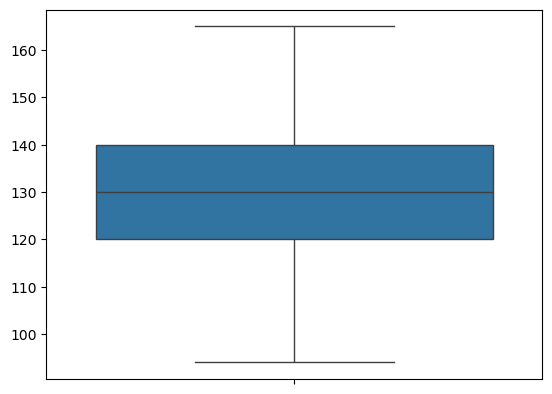

In [82]:
sns.boxplot(trtbps_winsorize) ## There is no outlier

In [83]:
dataset['trtbps_winsorize'] = trtbps_winsorize
dataset.head()

age  sex  cp  trtbps  thalach  exang  oldpeak  slp  ca  thall  target  \
0   63    1   3     145      150      0      2.3    0   0      1       1   
1   37    1   2     130      187      0      3.5    0   0      2       1   
2   41    0   1     130      172      0      1.4    2   0      2       1   
3   56    1   1     120      178      0      0.8    2   0      2       1   
4   57    0   0     120      163      1      0.6    2   0      2       1   

   trtbps_winsorize  
0               145  
1               130  
2               130  
3               120  
4               120

### Handle the outliers thalach variable using IQR 

In [84]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_bound = q1 - (1.5 * diff)
    upper_bound = q3 + (1.5 * diff)
    return df[(df[var] < lower_bound) | (df[var] > upper_bound)]

In [85]:
thalach_out = iqr(dataset, 'thalach')
thalach_out

age  sex  cp  trtbps  thalach  exang  oldpeak  slp  ca  thall  target  \
272   67    1   0     120       71      0      1.0    1   0      2       0   

     trtbps_winsorize  
272               120

In [86]:
dataset.drop([272], axis=0, inplace=True) ##dropping the outlier

<Axes: ylabel='thalach'>

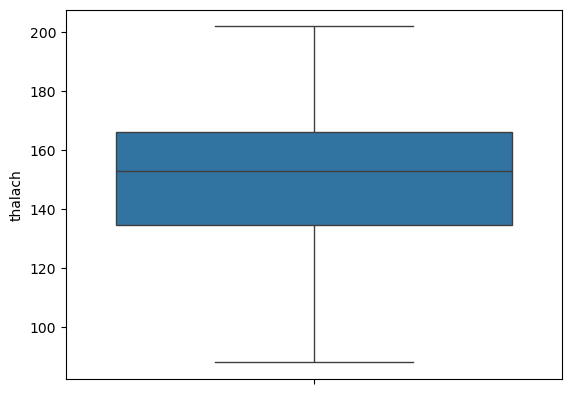

In [87]:
sns.boxplot(dataset['thalach'])

### Handle the outliers oldpeak variable using IQR & winsorize method

In [88]:
oldpeak_out = iqr(dataset, 'oldpeak')
oldpeak_out

age  sex  cp  trtbps  thalach  exang  oldpeak  slp  ca  thall  target  \
101   59    1   3     165      145      0      4.2    0   0      3       1   
204   62    0   0     160      145      0      6.2    0   3      3       0   
221   55    1   0     140      111      1      5.6    0   0      3       0   
250   51    1   0     140      122      1      4.2    1   3      3       0   
291   58    1   0     114      140      0      4.4    0   3      1       0   

     trtbps_winsorize  
101               165  
204               160  
221               140  
250               140  
291               114

In [89]:
dataset[dataset['oldpeak'] < 4.2]['oldpeak'].max()

4.0

In [90]:
winsorize_percentile_oldpeak = (stats.percentileofscore(dataset['oldpeak'], 4)/100)
winsorize_percentile_oldpeak

np.float64(0.980132450331126)

In [91]:
oldpeak_winsorize = winsorize(dataset['oldpeak'], (0, (1 - winsorize_percentile_oldpeak)))
oldpeak_winsorize

masked_array(data=[2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2,
                   0.2, 0.6, 1.8, 1. , 1.6, 0. , 2.6, 1.5, 1.8, 0.5, 0.4,
                   0. , 1. , 1.4, 0.4, 1.6, 0.6, 0.8, 1.2, 0. , 0.4, 0. ,
                   0.5, 1.4, 1.4, 0. , 1.6, 0.8, 0.8, 1.5, 0.2, 3. , 0.4,
                   0. , 0.2, 0. , 0. , 0. , 0. , 0.5, 0.4, 1.8, 0.6, 0. ,
                   0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1.4,
                   1.2, 0.6, 0. , 0. , 0.4, 0. , 0. , 0. , 0.2, 1.4, 2.4,
                   0. , 0. , 0.6, 0. , 0. , 0. , 1.2, 0.6, 1.6, 1. , 0. ,
                   1.6, 1. , 0. , 0. , 0. , 0. , 0. , 0. , 1.2, 0.1, 1.9,
                   0. , 0.8, 4. , 0. , 0.8, 0. , 1.5, 0.1, 0.2, 1.1, 0. ,
                   0. , 0.2, 0.2, 0. , 0. , 0. , 2. , 1.9, 0. , 0. , 2. ,
                   0. , 0. , 0. , 0. , 0.7, 0.1, 0. , 0.1, 0.2, 0. , 0. ,
                   0. , 0. , 0. , 0. , 0. , 0. , 1.5, 0.2, 0.6, 1.2, 0. ,
                   0.3, 1.1, 0. , 0.3,

<Axes: >

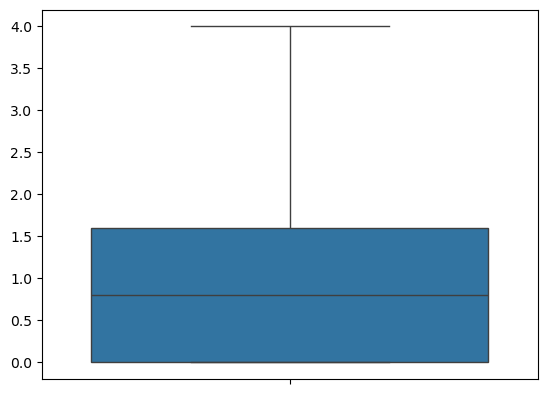

In [92]:
sns.boxplot(oldpeak_winsorize)

In [93]:
dataset['oldpeak_winsorize'] = oldpeak_winsorize
dataset

age  sex  cp  trtbps  thalach  exang  oldpeak  slp  ca  thall  target  \
0     63    1   3     145      150      0      2.3    0   0      1       1   
1     37    1   2     130      187      0      3.5    0   0      2       1   
2     41    0   1     130      172      0      1.4    2   0      2       1   
3     56    1   1     120      178      0      0.8    2   0      2       1   
4     57    0   0     120      163      1      0.6    2   0      2       1   
..   ...  ...  ..     ...      ...    ...      ...  ...  ..    ...     ...   
298   57    0   0     140      123      1      0.2    1   0      3       0   
299   45    1   3     110      132      0      1.2    1   0      3       0   
300   68    1   0     144      141      0      3.4    1   2      3       0   
301   57    1   0     130      115      1      1.2    1   1      3       0   
302   57    0   1     130      174      0      0.0    1   1      2       0   

     trtbps_winsorize  oldpeak_winsorize  
0                 145                2.3  
1                 130                3.5  
2                 130                1.4  
3                 120                0.8  
4                 120                0.6  
..                ...                ...  
298               140                0.2  
299               110                1.2  
300               144                3.4  
301               130                1.2  
302               130                0.0  

[302 rows x 13 columns]

In [94]:
dataset.loc[[101]]

age  sex  cp  trtbps  thalach  exang  oldpeak  slp  ca  thall  target  \
101   59    1   3     165      145      0      4.0    0   0      3       1   

     trtbps_winsorize  oldpeak_winsorize  
101               165                4.0

In [95]:
dataset.drop(['trtbps', 'oldpeak'], axis = 1, inplace=True)

In [96]:
dataset.head()

age  sex  cp  thalach  exang  slp  ca  thall  target  trtbps_winsorize  \
0   63    1   3      150      0    0   0      1       1               145   
1   37    1   2      187      0    0   0      2       1               130   
2   41    0   1      172      0    2   0      2       1               130   
3   56    1   1      178      0    2   0      2       1               120   
4   57    0   0      163      1    2   0      2       1               120   

   oldpeak_winsorize  
0                2.3  
1                3.5  
2                1.4  
3                0.8  
4                0.6

### Checking numeric distribution (symmetric/unsymmetric)

Text(0.5, 1.0, 'oldpeak_winsorize')

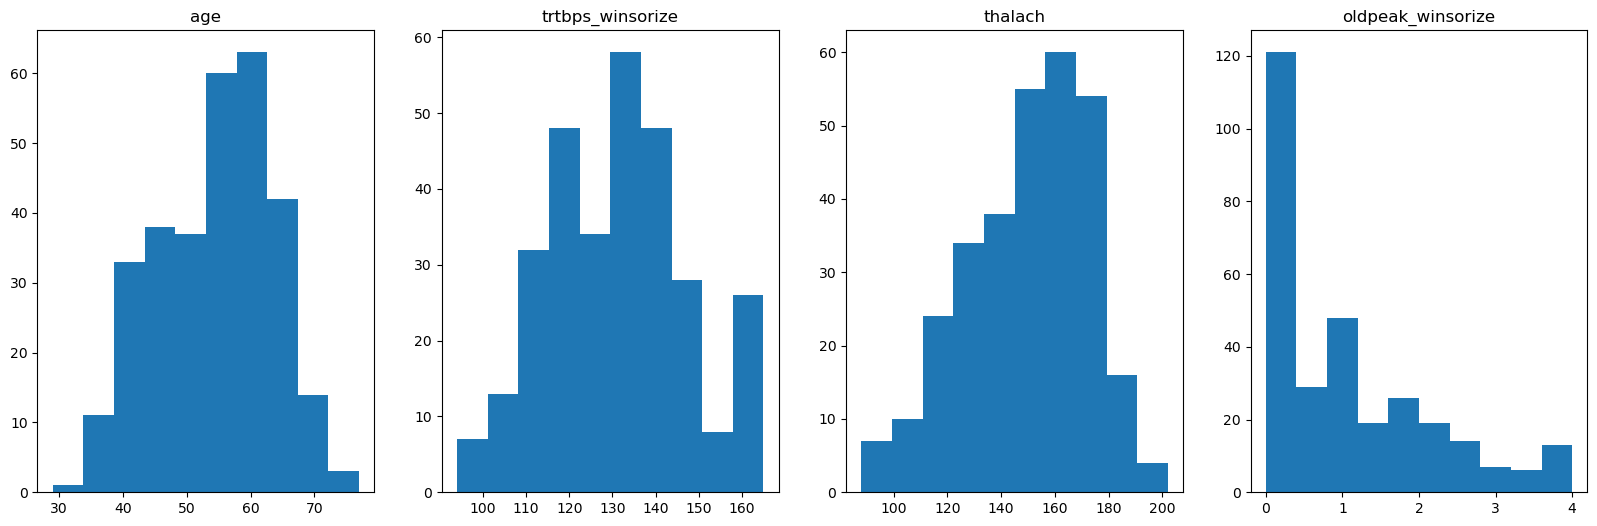

In [97]:
fig, ax = plt.subplots(1, 4, figsize=(20,6))

ax[0].hist(dataset['age'])
ax[0].set_title('age')

ax[1].hist(dataset['trtbps_winsorize'])
ax[1].set_title('trtbps_winsorize')

ax[2].hist(dataset['thalach'])
ax[2].set_title('thalach')

ax[3].hist(dataset['oldpeak_winsorize'])
ax[3].set_title('oldpeak_winsorize')

### Transforming unsymmetrical data (oldpeak)

In [98]:
dataset[['age', 'trtbps_winsorize', 'thalach', 'oldpeak_winsorize']].agg(['skew']).transpose()

skew
age               -0.199209
trtbps_winsorize   0.251969
thalach           -0.461611
oldpeak_winsorize  0.996036

In [99]:
dataset['oldpeak_winsorize_sqrt'] = np.sqrt(dataset['oldpeak_winsorize'])
dataset.head()

age  sex  cp  thalach  exang  slp  ca  thall  target  trtbps_winsorize  \
0   63    1   3      150      0    0   0      1       1               145   
1   37    1   2      187      0    0   0      2       1               130   
2   41    0   1      172      0    2   0      2       1               130   
3   56    1   1      178      0    2   0      2       1               120   
4   57    0   0      163      1    2   0      2       1               120   

   oldpeak_winsorize  oldpeak_winsorize_sqrt  
0                2.3                1.516575  
1                3.5                1.870829  
2                1.4                1.183216  
3                0.8                0.894427  
4                0.6                0.774597

In [100]:
dataset[['oldpeak_winsorize', 'oldpeak_winsorize_sqrt']].agg(['skew']).transpose()

skew
oldpeak_winsorize       0.996036
oldpeak_winsorize_sqrt  0.108926

In [102]:
dataset.drop(['oldpeak_winsorize'], axis=1, inplace=True)

<Axes: xlabel='oldpeak_winsorize_sqrt', ylabel='Count'>

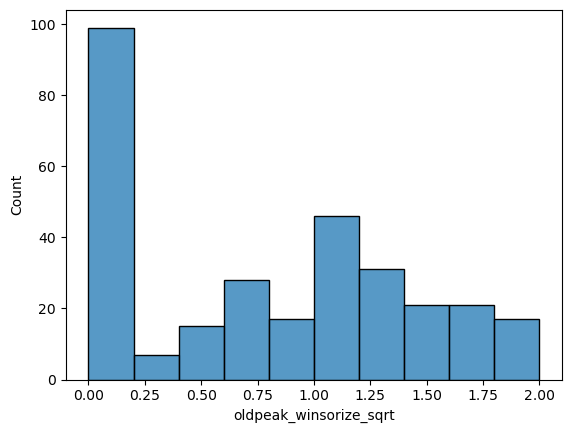

In [103]:
sns.histplot(data=dataset['oldpeak_winsorize_sqrt'])

### Applying one hot encoding method to categorical variables

In [104]:
categorical_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slp', 'ca', 'thall', 'target']

In [105]:
categorical_var.remove('fbs')
categorical_var.remove('rest_ecg')
categorical_var

['sex', 'cp', 'exang', 'slp', 'ca', 'thall', 'target']

In [106]:
df_copy = dataset.copy()

In [107]:
df_copy = pd.get_dummies(df_copy, columns=categorical_var[:-1], drop_first=True)
df_copy.head()

age  thalach  target  trtbps_winsorize  oldpeak_winsorize_sqrt  sex_1  \
0   63      150       1               145                1.516575   True   
1   37      187       1               130                1.870829   True   
2   41      172       1               130                1.183216  False   
3   56      178       1               120                0.894427   True   
4   57      163       1               120                0.774597  False   

    cp_1   cp_2   cp_3  exang_1  slp_1  slp_2   ca_1   ca_2   ca_3   ca_4  \
0  False  False   True    False  False  False  False  False  False  False   
1  False   True  False    False  False  False  False  False  False  False   
2   True  False  False    False  False   True  False  False  False  False   
3   True  False  False    False  False   True  False  False  False  False   
4  False  False  False     True  False   True  False  False  False  False   

   thall_2  thall_3  
0    False    False  
1     True    False  
2     True    False  
3     True    False  
4     True    False

### Scaling the numerical variable

In [109]:
new_numeric_var = ['age', 'thalach', 'trtbps_winsorize', 'oldpeak_winsorize_sqrt']

In [110]:
df_copy[new_numeric_var] = robust_scaler.fit_transform(df_copy[new_numeric_var])
df_copy.head()

age   thalach  target  trtbps_winsorize  oldpeak_winsorize_sqrt  \
0  0.581818 -0.095238       1              0.75                0.491851   
1 -1.309091  1.079365       1              0.00                0.771913   
2 -1.018182  0.603175       1              0.00                0.228308   
3  0.072727  0.793651       1             -0.50                0.000000   
4  0.145455  0.317460       1             -0.50               -0.094734   

   sex_1   cp_1   cp_2   cp_3  exang_1  slp_1  slp_2   ca_1   ca_2   ca_3  \
0   True  False  False   True    False  False  False  False  False  False   
1   True  False   True  False    False  False  False  False  False  False   
2  False   True  False  False    False  False   True  False  False  False   
3   True   True  False  False    False  False   True  False  False  False   
4  False  False  False  False     True  False   True  False  False  False   

    ca_4  thall_2  thall_3  
0  False    False    False  
1  False     True    False  
2  False     True    False  
3  False     True    False  
4  False     True    False